In [1]:
library(tidyverse)
library(caret)
library(rpart)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'readr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"Warning message:
"package 'stringr' was built under R version 3.6.2"Warning message:
"package 'forcats' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning mess

In [2]:
titanic_train <- read_csv("./data/train.csv")
titanic_test <- read_csv("./data/test.csv")

Parsed with column specification:
cols(
  PassengerId = col_double(),
  Survived = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)
Parsed with column specification:
cols(
  PassengerId = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)


In [3]:
str(titanic_train)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	891 obs. of  12 variables:
 $ PassengerId: num  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : num  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : num  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : num  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : num  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  NA "C85" NA "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   PassengerId = col_double(),
  ..   Survived = col_double(),
  ..   Pclass = col_double(),
  ..   Name = col_character(),
  ..   Sex = col_character(),

In [4]:
str(titanic_test)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	418 obs. of  11 variables:
 $ PassengerId: num  892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : num  3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : chr  "Kelly, Mr. James" "Wilkes, Mrs. James (Ellen Needs)" "Myles, Mr. Thomas Francis" "Wirz, Mr. Albert" ...
 $ Sex        : chr  "male" "female" "male" "male" ...
 $ Age        : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : num  0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : num  0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : chr  "330911" "363272" "240276" "315154" ...
 $ Fare       : num  7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : chr  NA NA NA NA ...
 $ Embarked   : chr  "Q" "S" "Q" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   PassengerId = col_double(),
  ..   Pclass = col_double(),
  ..   Name = col_character(),
  ..   Sex = col_character(),
  ..   Age = col_double(),
  ..   SibSp = col_double(),
  ..   Parch = col_double(),
  ..   Ticket = col_character(),
  ..   Fare = co

### Check for any NAs

In [5]:
#which of the columns have NA
na_col_train <- apply(titanic_train, 2, function(x){
            any(is.na(x))
})
na_col_train

PassengerId    Survived      Pclass        Name         Sex         Age 
      FALSE       FALSE       FALSE       FALSE       FALSE        TRUE 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
      FALSE       FALSE       FALSE       FALSE        TRUE        TRUE

In [6]:
#indices of NA entities
na_matrix_train <- apply(titanic_train, 2, function(x){
            is.na(x)
})
na_tib_train <- na_matrix_train %>% as_tibble()
na_Age_ind_train <- which(na_tib_train$Age == TRUE)
na_Cabin_ind_train <- which(na_tib_train$Cabin == TRUE)
na_Embarked_ind_train <- which (na_tib_train$Embarked == TRUE)

In [7]:
length(na_Age_ind_train)

[1] 177

In [8]:
length(na_Cabin_ind_train)

[1] 687

In [9]:
length(na_Embarked_ind_train)

[1] 2

In [10]:
#which of the columns have NA
na_col_test <- apply(titanic_test, 2, function(x){
            any(is.na(x))
})
na_col_test

PassengerId      Pclass        Name         Sex         Age       SibSp 
      FALSE       FALSE       FALSE       FALSE        TRUE       FALSE 
      Parch      Ticket        Fare       Cabin    Embarked 
      FALSE       FALSE        TRUE        TRUE       FALSE

In [11]:
#indices of NA entities
na_matrix_test <- apply(titanic_test, 2, function(x){
            is.na(x)
})
na_tib_test <- na_matrix_test %>% as_tibble()
na_Age_ind_test <- which(na_tib_test$Age == TRUE)
na_Fare_ind_test <- which(na_tib_test$Fare == TRUE)
na_Cabin_ind_test <- which(na_tib_test$Cabin == TRUE)

In [12]:
length(na_Age_ind_test)

[1] 86

In [13]:
length(na_Fare_ind_test)

[1] 1

In [14]:
length(na_Cabin_ind_test)

[1] 327

### Handle missing values

In [15]:
titanic_train$Age[na_Age_ind_train] <- titanic_train %>% filter(!is.na(Age)) %>%
    pull(Age) %>% median()

In [16]:
sum(is.na(titanic_train$Age))

[1] 0

In [17]:
titanic_train %>% .$Embarked %>% as_factor() %>% summary()

S    C    Q NA's 
 644  168   77    2

In [18]:
titanic_train$Embarked[na_Embarked_ind_train] <- "S" 

In [19]:
titanic_test$Age[na_Age_ind_test] <- titanic_test %>% filter(!is.na(Age)) %>%
    pull(Age) %>% median()

In [20]:
titanic_test$Fare[na_Fare_ind_test] <- titanic_test %>% filter(!is.na(Fare)) %>%
    pull(Fare) %>% median()

### Check how many percentages of females and males survived

In [21]:
titanic_train %>% group_by(Sex) %>% summarize(mean(Survived))

Sex,mean(Survived)
female,0.7420382
male,0.1889081


### Gender model

In [22]:
y_hat_gender <- ifelse(titanic_test$Sex == "female", 1, 0)
pred_gender <- tibble(PassengerId = titanic_test$PassengerId,
                     Survived = y_hat_gender)
write_csv(pred_gender, "./csv_files/pred_gender.csv")

Gender model would score 0.76555

### Factorize train and test sets

In [23]:
titanic_train_factorized <- titanic_train %>% mutate(Survived = factor(Survived),
                                               Pclass = factor(Pclass),
                                               Sex = factor(Sex),
                                               Embarked = factor(Embarked)) %>%
                            select(Survived, Sex, Pclass, Age, SibSp, Parch, Fare, Embarked)

In [24]:
titanic_test_factorized <- titanic_test %>% mutate(Pclass = factor(Pclass),
                                               Sex = factor(Sex),
                                               Embarked = factor(Embarked)) %>%
                            select(Sex, Pclass, Age, SibSp, Parch, Fare, Embarked)

### Feature engineering and transformation

In [25]:
# adding a new feature that is family size
titanic_train_factorized <- titanic_train_factorized %>% mutate(FamilySize = SibSp + Parch)
titanic_test_factorized <- titanic_test_factorized %>% mutate(FamilySize = SibSp + Parch)

In [26]:
normalize <- function(x){
    (x - min(x)) / (max(x) - min(x))
}

In [27]:
titanic_train_factorized <- titanic_train_factorized %>% mutate(Age = normalize(Age), Fare = normalize(Fare),
                                                               SibSp = normalize(SibSp), Parch = normalize(Parch),
                                                               FamilySize = normalize(FamilySize))
titanic_test_factorized <- titanic_test_factorized %>% mutate(Age = normalize(Age), Fare = normalize(Fare),
                                                               SibSp = normalize(SibSp), Parch = normalize(Parch),
                                                               FamilySize = normalize(FamilySize))

### Neural Networks with nnet (single hidden layer)

In [28]:
fit_nnet <- train(Survived ~ ., method = "nnet", data = titanic_train_factorized,
                 tuneGrid = expand.grid(size = seq(from = 1, to = 10, by = 1),
                        decay = seq(from = 0.1, to = 0.7, by = 0.1)),
                 trControl = trainControl(method="repeatedcv", number=10, repeats = 3))

# weights:  13
initial  value 610.447160 
iter  10 value 536.167835
iter  20 value 415.950397
iter  30 value 358.495834
iter  40 value 353.680181
final  value 353.679454 
converged
# weights:  25
initial  value 597.978241 
iter  10 value 373.495230
iter  20 value 354.318647
iter  30 value 351.405127
iter  40 value 349.087724
iter  50 value 344.878864
iter  60 value 344.427961
iter  70 value 344.364449
final  value 344.364247 
converged
# weights:  37
initial  value 797.163569 
iter  10 value 361.735852
iter  20 value 351.246161
iter  30 value 346.230690
iter  40 value 344.312820
iter  50 value 341.844263
iter  60 value 339.906925
iter  70 value 339.337631
iter  80 value 339.037345
iter  90 value 338.980541
iter 100 value 338.976022
final  value 338.976022 
stopped after 100 iterations
# weights:  49
initial  value 565.025754 
iter  10 value 372.530044
iter  20 value 350.481919
iter  30 value 343.315499
iter  40 value 338.605778
iter  50 value 338.138220
iter  60 value 337.765098
iter  

initial  value 618.345299 
iter  10 value 377.483904
iter  20 value 364.427635
iter  30 value 361.794351
iter  40 value 360.909838
iter  50 value 360.648308
iter  60 value 360.539929
iter  70 value 360.457098
iter  80 value 360.404205
iter  90 value 360.368659
iter 100 value 360.360361
final  value 360.360361 
stopped after 100 iterations
# weights:  109
initial  value 590.003535 
iter  10 value 404.776414
iter  20 value 366.929268
iter  30 value 362.429998
iter  40 value 360.929455
iter  50 value 359.627744
iter  60 value 359.234551
iter  70 value 359.056859
iter  80 value 358.956617
iter  90 value 358.879168
iter 100 value 358.868380
final  value 358.868380 
stopped after 100 iterations
# weights:  121
initial  value 753.246747 
iter  10 value 403.632616
iter  20 value 364.173714
iter  30 value 360.983146
iter  40 value 359.828489
iter  50 value 359.114817
iter  60 value 358.964653
iter  70 value 358.887007
iter  80 value 358.804216
iter  90 value 358.742226
iter 100 value 358.728615

initial  value 650.825941 
iter  10 value 404.584501
iter  20 value 381.699173
iter  30 value 378.815361
iter  40 value 377.035427
iter  50 value 376.640814
iter  60 value 376.459816
iter  70 value 376.404840
iter  80 value 376.385937
iter  90 value 376.375823
iter 100 value 376.372046
final  value 376.372046 
stopped after 100 iterations
# weights:  97
initial  value 793.612747 
iter  10 value 387.039624
iter  20 value 378.989728
iter  30 value 376.872193
iter  40 value 376.549814
iter  50 value 376.449445
iter  60 value 376.305732
iter  70 value 376.183202
iter  80 value 376.100538
iter  90 value 376.085458
iter 100 value 376.068646
final  value 376.068646 
stopped after 100 iterations
# weights:  109
initial  value 567.620099 
iter  10 value 383.472882
iter  20 value 377.340175
iter  30 value 376.797036
iter  40 value 376.336302
iter  50 value 376.162831
iter  60 value 376.004820
iter  70 value 375.932854
iter  80 value 375.908731
iter  90 value 375.868613
iter 100 value 375.857261


initial  value 644.717952 
iter  10 value 389.126871
iter  20 value 352.864971
iter  30 value 348.604978
iter  40 value 348.217002
iter  50 value 348.029786
iter  60 value 347.914744
iter  70 value 347.708028
iter  80 value 347.527816
iter  90 value 347.501811
iter 100 value 347.480475
final  value 347.480475 
stopped after 100 iterations
# weights:  73
initial  value 627.248957 
iter  10 value 359.990536
iter  20 value 350.787750
iter  30 value 348.092786
iter  40 value 347.246556
iter  50 value 347.060688
iter  60 value 346.995539
iter  70 value 346.982663
iter  80 value 346.970260
iter  90 value 346.953756
iter 100 value 346.894723
final  value 346.894723 
stopped after 100 iterations
# weights:  85
initial  value 529.863496 
iter  10 value 397.596082
iter  20 value 352.227862
iter  30 value 348.309656
iter  40 value 347.293846
iter  50 value 346.895675
iter  60 value 346.834729
iter  70 value 346.806154
iter  80 value 346.795554
iter  90 value 346.782994
iter 100 value 346.774756
f

initial  value 659.938885 
iter  10 value 431.088683
iter  20 value 377.555855
final  value 377.536388 
converged
# weights:  25
initial  value 547.680247 
iter  10 value 390.199924
iter  20 value 373.210829
iter  30 value 369.875734
iter  40 value 369.473580
iter  50 value 369.419773
iter  50 value 369.419772
iter  50 value 369.419772
final  value 369.419772 
converged
# weights:  37
initial  value 565.846195 
iter  10 value 400.896242
iter  20 value 377.655566
iter  30 value 372.690043
iter  40 value 370.951205
iter  50 value 369.803204
iter  60 value 369.412672
iter  70 value 369.382206
iter  80 value 369.319441
iter  90 value 368.806524
iter 100 value 368.378675
final  value 368.378675 
stopped after 100 iterations
# weights:  49
initial  value 531.272717 
iter  10 value 374.563439
iter  20 value 368.810663
iter  30 value 368.127103
iter  40 value 367.989702
iter  50 value 367.960008
iter  60 value 367.956847
final  value 367.956538 
converged
# weights:  61
initial  value 542.2528

initial  value 615.769196 
iter  10 value 382.052784
iter  20 value 377.214427
iter  30 value 376.287865
iter  40 value 375.960113
iter  50 value 375.839014
iter  60 value 375.721640
iter  70 value 375.567392
iter  80 value 375.439440
iter  90 value 375.431418
iter 100 value 375.429137
final  value 375.429137 
stopped after 100 iterations
# weights:  13
initial  value 572.694104 
iter  10 value 512.848009
iter  20 value 390.318547
iter  30 value 362.209075
iter  40 value 356.978238
final  value 356.875152 
converged
# weights:  25
initial  value 698.676516 
iter  10 value 382.271718
iter  20 value 358.334640
iter  30 value 354.921673
iter  40 value 352.310143
iter  50 value 349.774370
iter  60 value 347.578153
iter  70 value 345.602588
iter  80 value 345.582094
iter  80 value 345.582092
iter  80 value 345.582092
final  value 345.582092 
converged
# weights:  37
initial  value 527.746967 
iter  10 value 361.820878
iter  20 value 349.026769
iter  30 value 345.169630
iter  40 value 344.17

initial  value 542.869897 
iter  10 value 384.046457
iter  20 value 366.561484
iter  30 value 363.676609
iter  40 value 362.800922
iter  50 value 362.660519
iter  60 value 362.503460
iter  70 value 362.417130
iter  80 value 362.339958
iter  90 value 362.313643
iter 100 value 362.308837
final  value 362.308837 
stopped after 100 iterations
# weights:  85
initial  value 730.163680 
iter  10 value 374.858168
iter  20 value 363.616202
iter  30 value 362.821173
iter  40 value 362.416743
iter  50 value 362.289974
iter  60 value 362.259614
iter  70 value 362.251903
iter  80 value 362.249981
iter  90 value 362.247452
iter 100 value 362.247257
final  value 362.247257 
stopped after 100 iterations
# weights:  97
initial  value 580.298725 
iter  10 value 383.929173
iter  20 value 365.545775
iter  30 value 363.820788
iter  40 value 362.953893
iter  50 value 362.609819
iter  60 value 362.483312
iter  70 value 362.433193
iter  80 value 362.385186
iter  90 value 362.319267
iter 100 value 362.248134
f

initial  value 686.616848 
iter  10 value 414.526901
iter  20 value 383.219201
iter  30 value 381.465191
iter  40 value 380.940982
iter  50 value 380.891233
iter  60 value 380.139401
iter  70 value 379.662382
iter  80 value 379.616495
iter  90 value 379.596289
iter 100 value 379.523420
final  value 379.523420 
stopped after 100 iterations
# weights:  49
initial  value 561.633665 
iter  10 value 398.144307
iter  20 value 381.978489
iter  30 value 379.911603
iter  40 value 379.491067
iter  50 value 379.352294
iter  60 value 379.318941
iter  70 value 379.278545
iter  80 value 379.260382
iter  90 value 379.258248
iter 100 value 379.239362
final  value 379.239362 
stopped after 100 iterations
# weights:  61
initial  value 669.244336 
iter  10 value 406.946992
iter  20 value 381.484836
iter  30 value 379.115078
iter  40 value 378.752732
iter  50 value 378.577940
iter  60 value 378.543326
iter  70 value 378.537456
iter  80 value 378.530125
iter  90 value 378.527602
iter  90 value 378.527599
i

initial  value 636.045720 
iter  10 value 357.869006
iter  20 value 346.330663
iter  30 value 341.387480
iter  40 value 338.527117
iter  50 value 337.848462
iter  60 value 337.681773
iter  70 value 337.602400
iter  80 value 337.581226
iter  90 value 337.571869
iter 100 value 337.569671
final  value 337.569671 
stopped after 100 iterations
# weights:  13
initial  value 568.381534 
iter  10 value 395.227597
iter  20 value 364.164254
final  value 363.719114 
converged
# weights:  25
initial  value 576.677600 
iter  10 value 372.474681
iter  20 value 362.147113
iter  30 value 359.044517
iter  40 value 357.559337
iter  50 value 355.823615
iter  60 value 355.108868
iter  70 value 355.056103
final  value 355.056068 
converged
# weights:  37
initial  value 543.708534 
iter  10 value 375.020130
iter  20 value 361.073635
iter  30 value 359.786941
iter  40 value 357.571330
iter  50 value 356.427867
iter  60 value 356.167223
iter  70 value 355.513789
iter  80 value 355.206341
iter  90 value 355.01

initial  value 566.366110 
iter  10 value 382.880400
iter  20 value 372.571081
iter  30 value 369.442409
iter  40 value 368.748652
iter  50 value 368.461830
iter  60 value 368.334700
iter  70 value 368.297244
iter  80 value 368.269370
iter  90 value 368.211699
iter 100 value 368.206016
final  value 368.206016 
stopped after 100 iterations
# weights:  85
initial  value 582.099400 
iter  10 value 380.623027
iter  20 value 370.400950
iter  30 value 369.523019
iter  40 value 369.391869
iter  50 value 369.211635
iter  60 value 368.948534
iter  70 value 368.870539
iter  80 value 368.838997
iter  90 value 368.806299
iter 100 value 368.775183
final  value 368.775183 
stopped after 100 iterations
# weights:  97
initial  value 652.292742 
iter  10 value 378.912884
iter  20 value 370.054720
iter  30 value 368.273169
iter  40 value 368.030284
iter  50 value 367.980513
iter  60 value 367.936260
iter  70 value 367.914284
iter  80 value 367.912225
iter  90 value 367.910115
final  value 367.910080 
co

initial  value 552.565853 
iter  10 value 402.356506
iter  20 value 388.051728
iter  30 value 385.579001
iter  40 value 384.004627
iter  50 value 383.252485
iter  60 value 383.093941
iter  70 value 383.055192
iter  80 value 383.041951
iter  90 value 383.031039
final  value 383.030208 
converged
# weights:  73
initial  value 785.233287 
iter  10 value 401.252142
iter  20 value 388.920459
iter  30 value 387.105586
iter  40 value 384.938901
iter  50 value 384.569350
iter  60 value 383.733568
iter  70 value 383.209366
iter  80 value 382.851824
iter  90 value 382.790638
iter 100 value 382.764490
final  value 382.764490 
stopped after 100 iterations
# weights:  85
initial  value 573.513863 
iter  10 value 410.205539
iter  20 value 385.758904
iter  30 value 384.020682
iter  40 value 383.079977
iter  50 value 382.761455
iter  60 value 382.522724
iter  70 value 382.475204
iter  80 value 382.468757
iter  90 value 382.465520
iter 100 value 382.461949
final  value 382.461949 
stopped after 100 ite

initial  value 656.623759 
iter  10 value 534.923176
iter  20 value 368.004004
iter  30 value 362.387710
final  value 362.386453 
converged
# weights:  25
initial  value 539.012678 
iter  10 value 389.655622
iter  20 value 368.088319
iter  30 value 367.593719
iter  40 value 362.594428
iter  50 value 358.652098
iter  60 value 355.193009
iter  70 value 354.659840
final  value 354.658808 
converged
# weights:  37
initial  value 555.113797 
iter  10 value 381.230496
iter  20 value 360.459447
iter  30 value 358.815260
iter  40 value 358.119309
iter  50 value 357.108569
iter  60 value 356.775023
iter  70 value 355.907163
iter  80 value 355.252254
iter  90 value 354.785090
iter 100 value 354.485892
final  value 354.485892 
stopped after 100 iterations
# weights:  49
initial  value 563.576935 
iter  10 value 363.349536
iter  20 value 356.016025
iter  30 value 354.495923
iter  40 value 354.228506
iter  50 value 353.915500
iter  60 value 353.692696
iter  70 value 353.649333
iter  80 value 353.64

initial  value 672.633570 
iter  10 value 374.305875
iter  20 value 367.851211
iter  30 value 367.224127
iter  40 value 366.718065
iter  50 value 366.475866
iter  60 value 366.214653
iter  70 value 366.130465
iter  80 value 366.065858
iter  90 value 366.033055
iter 100 value 366.022493
final  value 366.022493 
stopped after 100 iterations
# weights:  109
initial  value 636.563508 
iter  10 value 379.675752
iter  20 value 367.959296
iter  30 value 367.073269
iter  40 value 366.640337
iter  50 value 366.302052
iter  60 value 366.073449
iter  70 value 365.941426
iter  80 value 365.876349
iter  90 value 365.854656
iter 100 value 365.843787
final  value 365.843787 
stopped after 100 iterations
# weights:  121
initial  value 646.467728 
iter  10 value 378.588135
iter  20 value 369.236490
iter  30 value 366.680893
iter  40 value 366.403231
iter  50 value 366.139222
iter  60 value 366.051353
iter  70 value 365.968212
iter  80 value 365.946655
iter  90 value 365.926557
iter 100 value 365.904648

initial  value 529.208068 
iter  10 value 355.811820
iter  20 value 340.030225
iter  30 value 336.766046
iter  40 value 335.792259
iter  50 value 335.427743
iter  60 value 334.746546
iter  70 value 334.096249
iter  80 value 333.773574
iter  90 value 333.611870
iter 100 value 333.514508
final  value 333.514508 
stopped after 100 iterations
# weights:  85
initial  value 531.501086 
iter  10 value 365.144873
iter  20 value 340.415295
iter  30 value 336.327475
iter  40 value 335.099115
iter  50 value 334.836244
iter  60 value 334.556548
iter  70 value 334.464457
iter  80 value 334.449263
iter  90 value 334.423326
iter 100 value 334.411950
final  value 334.411950 
stopped after 100 iterations
# weights:  97
initial  value 644.424775 
iter  10 value 346.174584
iter  20 value 339.479213
iter  30 value 335.307086
iter  40 value 333.793243
iter  50 value 333.583041
iter  60 value 333.487957
iter  70 value 333.390953
iter  80 value 333.363133
iter  90 value 333.357045
iter 100 value 333.353593
f

initial  value 579.577556 
iter  10 value 420.679749
iter  20 value 369.583950
iter  30 value 362.775179
iter  40 value 362.069522
iter  50 value 362.068184
iter  50 value 362.068183
iter  50 value 362.068183
final  value 362.068183 
converged
# weights:  37
initial  value 538.787768 
iter  10 value 384.566562
iter  20 value 368.109061
iter  30 value 365.538615
iter  40 value 362.434292
iter  50 value 362.131721
iter  60 value 361.509556
iter  70 value 361.429042
iter  80 value 361.422534
iter  90 value 361.414135
final  value 361.413738 
converged
# weights:  49
initial  value 552.371508 
iter  10 value 388.861551
iter  20 value 366.957891
iter  30 value 364.447612
iter  40 value 363.012515
iter  50 value 362.220664
iter  60 value 362.042121
iter  70 value 361.524838
iter  80 value 361.307647
iter  90 value 361.210127
iter 100 value 361.132256
final  value 361.132256 
stopped after 100 iterations
# weights:  61
initial  value 606.905073 
iter  10 value 385.151272
iter  20 value 363.17

initial  value 538.926712 
iter  10 value 376.205604
iter  20 value 371.117958
iter  30 value 370.638814
iter  40 value 370.513291
iter  50 value 370.412900
iter  60 value 370.325347
iter  70 value 370.245936
iter  80 value 370.192033
iter  90 value 370.163493
iter 100 value 370.158262
final  value 370.158262 
stopped after 100 iterations
# weights:  121
initial  value 640.033418 
iter  10 value 377.236635
iter  20 value 370.808097
iter  30 value 370.384285
iter  40 value 370.207441
iter  50 value 370.105463
iter  60 value 370.079942
iter  70 value 370.079679
final  value 370.079582 
converged
# weights:  13
initial  value 565.671786 
iter  10 value 459.055774
iter  20 value 393.724095
iter  30 value 386.527522
iter  40 value 386.462866
final  value 386.462792 
converged
# weights:  25
initial  value 549.287713 
iter  10 value 421.736545
iter  20 value 383.811578
iter  30 value 378.698687
iter  40 value 377.622343
iter  50 value 377.270781
iter  60 value 377.261443
final  value 377.260

initial  value 587.841807 
iter  10 value 376.092657
iter  20 value 356.095347
iter  30 value 353.832823
iter  40 value 353.312505
iter  50 value 353.268113
iter  60 value 353.133642
iter  70 value 352.983650
iter  80 value 352.957785
iter  90 value 352.930155
iter 100 value 352.922882
final  value 352.922882 
stopped after 100 iterations
# weights:  97
initial  value 528.635457 
iter  10 value 360.936137
iter  20 value 353.676937
iter  30 value 352.518279
iter  40 value 352.406333
iter  50 value 352.324245
iter  60 value 352.277949
iter  70 value 352.261891
iter  80 value 352.251351
iter  90 value 352.248234
iter 100 value 352.247843
final  value 352.247843 
stopped after 100 iterations
# weights:  109
initial  value 558.831041 
iter  10 value 372.514794
iter  20 value 355.667198
iter  30 value 354.122964
iter  40 value 353.315754
iter  50 value 353.028906
iter  60 value 352.940123
iter  70 value 352.894411
iter  80 value 352.859708
iter  90 value 352.841399
iter 100 value 352.824807


initial  value 581.218861 
iter  10 value 393.372570
iter  20 value 373.519374
iter  30 value 372.491318
iter  40 value 372.139925
iter  50 value 371.930642
iter  60 value 371.903457
iter  70 value 371.888297
iter  80 value 371.881792
final  value 371.881759 
converged
# weights:  73
initial  value 541.656373 
iter  10 value 382.699555
iter  20 value 373.960795
iter  30 value 372.340575
iter  40 value 371.936564
iter  50 value 371.712559
iter  60 value 371.669653
iter  70 value 371.662712
iter  80 value 371.662199
iter  90 value 371.661546
final  value 371.661501 
converged
# weights:  85
initial  value 551.526309 
iter  10 value 382.821149
iter  20 value 373.173488
iter  30 value 372.244570
iter  40 value 371.820449
iter  50 value 371.592579
iter  60 value 371.470718
iter  70 value 371.444290
iter  80 value 371.428415
iter  90 value 371.420136
iter 100 value 371.419315
final  value 371.419315 
stopped after 100 iterations
# weights:  97
initial  value 693.763117 
iter  10 value 391.96

initial  value 579.428742 
iter  10 value 356.447635
iter  20 value 344.813705
iter  30 value 343.181712
iter  40 value 342.960693
iter  50 value 342.181352
iter  60 value 342.128342
iter  70 value 342.051879
iter  80 value 341.340575
iter  90 value 340.056385
iter 100 value 339.649129
final  value 339.649129 
stopped after 100 iterations
# weights:  49
initial  value 535.617883 
iter  10 value 407.876703
iter  20 value 346.612697
iter  30 value 340.560582
iter  40 value 336.761580
iter  50 value 334.589609
iter  60 value 334.029908
iter  70 value 333.807161
iter  80 value 333.696343
iter  90 value 333.570062
iter 100 value 333.532026
final  value 333.532026 
stopped after 100 iterations
# weights:  61
initial  value 557.225942 
iter  10 value 359.729628
iter  20 value 341.666648
iter  30 value 338.716504
iter  40 value 337.531422
iter  50 value 335.822256
iter  60 value 334.811128
iter  70 value 334.094250
iter  80 value 333.429211
iter  90 value 333.269901
iter 100 value 333.103339
f

initial  value 810.594945 
iter  10 value 368.843810
iter  20 value 355.492490
iter  30 value 354.411743
iter  40 value 354.001793
iter  50 value 353.854016
iter  60 value 353.817988
iter  70 value 353.774464
iter  80 value 353.727618
iter  90 value 353.712915
iter 100 value 353.711514
final  value 353.711514 
stopped after 100 iterations
# weights:  13
initial  value 541.108657 
iter  10 value 397.467239
iter  20 value 366.283404
final  value 365.914900 
converged
# weights:  25
initial  value 537.506752 
iter  10 value 404.008250
iter  20 value 372.102752
iter  30 value 367.384711
iter  40 value 363.097235
iter  50 value 361.678239
iter  60 value 361.481335
final  value 361.472467 
converged
# weights:  37
initial  value 663.063475 
iter  10 value 377.323304
iter  20 value 367.418159
iter  30 value 364.519697
iter  40 value 363.221356
iter  50 value 362.090706
iter  60 value 361.490906
iter  70 value 360.847268
iter  80 value 360.604189
iter  90 value 360.551495
iter 100 value 360.53

initial  value 741.519975 
iter  10 value 389.008001
iter  20 value 372.270488
iter  30 value 369.890047
iter  40 value 369.252132
iter  50 value 369.150808
iter  60 value 369.125679
iter  70 value 369.105184
iter  80 value 369.092922
iter  90 value 369.092157
iter 100 value 369.091830
final  value 369.091830 
stopped after 100 iterations
# weights:  109
initial  value 881.421348 
iter  10 value 375.902344
iter  20 value 369.760900
iter  30 value 369.302220
iter  40 value 369.041937
iter  50 value 368.861343
iter  60 value 368.760387
iter  70 value 368.717915
iter  80 value 368.633459
iter  90 value 368.566847
iter 100 value 368.560068
final  value 368.560068 
stopped after 100 iterations
# weights:  121
initial  value 684.584302 
iter  10 value 400.481748
iter  20 value 371.473763
iter  30 value 369.600751
iter  40 value 369.315440
iter  50 value 369.057506
iter  60 value 368.850825
iter  70 value 368.611644
iter  80 value 368.564629
iter  90 value 368.499122
iter 100 value 368.452009

initial  value 556.825861 
iter  10 value 371.324840
iter  20 value 354.869958
iter  30 value 352.752387
iter  40 value 352.523106
iter  50 value 351.841710
iter  60 value 351.520671
iter  70 value 351.368872
iter  80 value 351.313224
iter  90 value 351.268639
iter 100 value 351.258881
final  value 351.258881 
stopped after 100 iterations
# weights:  85
initial  value 534.829868 
iter  10 value 379.693106
iter  20 value 357.173972
iter  30 value 353.151560
iter  40 value 351.591149
iter  50 value 351.437919
iter  60 value 351.394135
iter  70 value 351.380739
iter  80 value 351.343103
iter  90 value 351.263520
iter 100 value 351.219236
final  value 351.219236 
stopped after 100 iterations
# weights:  97
initial  value 558.402006 
iter  10 value 364.728484
iter  20 value 353.872909
iter  30 value 352.386892
iter  40 value 351.922495
iter  50 value 351.819992
iter  60 value 351.757688
iter  70 value 351.733164
iter  80 value 351.696393
iter  90 value 351.681177
iter 100 value 351.673807
f

initial  value 631.508620 
iter  10 value 418.881890
iter  20 value 383.372372
final  value 382.955646 
converged
# weights:  25
initial  value 544.912937 
iter  10 value 401.251777
iter  20 value 378.074785
iter  30 value 375.384260
iter  40 value 374.281705
iter  50 value 374.103567
iter  60 value 374.102596
final  value 374.102589 
converged
# weights:  37
initial  value 526.510026 
iter  10 value 384.514792
iter  20 value 375.043383
iter  30 value 374.559907
iter  40 value 374.280190
iter  50 value 373.523955
iter  60 value 373.335853
iter  70 value 373.289583
final  value 373.288545 
converged
# weights:  49
initial  value 562.948961 
iter  10 value 417.496374
iter  20 value 376.544245
iter  30 value 373.939333
iter  40 value 373.157028
iter  50 value 372.971898
iter  60 value 372.893349
iter  70 value 372.847096
iter  80 value 372.819476
iter  90 value 372.813703
final  value 372.813614 
converged
# weights:  61
initial  value 550.499396 
iter  10 value 387.308092
iter  20 value 

initial  value 618.830103 
iter  10 value 389.289775
iter  20 value 359.201692
iter  30 value 351.438193
iter  40 value 347.819327
iter  50 value 345.439300
iter  60 value 344.998749
iter  70 value 344.973849
final  value 344.973041 
converged
# weights:  37
initial  value 534.855023 
iter  10 value 358.601254
iter  20 value 343.529628
iter  30 value 341.436582
iter  40 value 340.028914
iter  50 value 339.826423
iter  60 value 339.676855
iter  70 value 339.543078
iter  80 value 339.528740
iter  90 value 339.501914
iter 100 value 339.407725
final  value 339.407725 
stopped after 100 iterations
# weights:  49
initial  value 566.377684 
iter  10 value 359.083821
iter  20 value 343.268493
iter  30 value 340.028480
iter  40 value 337.469136
iter  50 value 336.718720
iter  60 value 335.932631
iter  70 value 335.763292
iter  80 value 335.715153
iter  90 value 335.666665
iter 100 value 335.565738
final  value 335.565738 
stopped after 100 iterations
# weights:  61
initial  value 533.444135 
it

initial  value 562.300031 
iter  10 value 371.993423
iter  20 value 360.334381
iter  30 value 359.237182
iter  40 value 359.079190
iter  50 value 359.007174
iter  60 value 358.954609
iter  70 value 358.930286
iter  80 value 358.926413
final  value 358.926241 
converged
# weights:  109
initial  value 546.932894 
iter  10 value 369.693053
iter  20 value 361.006383
iter  30 value 359.180519
iter  40 value 359.013883
iter  50 value 358.967058
iter  60 value 358.902308
iter  70 value 358.848076
iter  80 value 358.823935
iter  90 value 358.817184
iter 100 value 358.812674
final  value 358.812674 
stopped after 100 iterations
# weights:  121
initial  value 572.510390 
iter  10 value 375.956221
iter  20 value 360.024882
iter  30 value 359.415340
iter  40 value 359.073812
iter  50 value 358.936820
iter  60 value 358.877686
iter  70 value 358.798028
iter  80 value 358.745763
iter  90 value 358.735717
iter 100 value 358.730843
final  value 358.730843 
stopped after 100 iterations
# weights:  13
i

initial  value 562.863378 
iter  10 value 397.184219
iter  20 value 380.506024
iter  30 value 379.289309
iter  40 value 378.874815
iter  50 value 378.011076
iter  60 value 377.559400
iter  70 value 377.208859
iter  80 value 376.930968
iter  90 value 376.840287
iter 100 value 376.825925
final  value 376.825925 
stopped after 100 iterations
# weights:  85
initial  value 830.389549 
iter  10 value 394.499797
iter  20 value 377.702306
iter  30 value 377.073258
iter  40 value 376.905217
iter  50 value 376.811451
iter  60 value 376.778343
iter  70 value 376.741599
iter  80 value 376.722874
iter  90 value 376.688194
iter 100 value 376.682166
final  value 376.682166 
stopped after 100 iterations
# weights:  97
initial  value 587.328622 
iter  10 value 422.404458
iter  20 value 382.189453
iter  30 value 378.403074
iter  40 value 377.490085
iter  50 value 376.868074
iter  60 value 376.654754
iter  70 value 376.531443
iter  80 value 376.439294
iter  90 value 376.380166
iter 100 value 376.370861
f

initial  value 597.208905 
iter  10 value 369.971029
iter  20 value 355.126793
iter  30 value 351.086990
iter  40 value 349.048715
iter  50 value 347.866113
iter  60 value 347.689652
iter  70 value 347.626724
iter  80 value 347.593596
iter  90 value 347.591410
iter 100 value 347.591149
final  value 347.591149 
stopped after 100 iterations
# weights:  49
initial  value 579.219653 
iter  10 value 381.539778
iter  20 value 349.139308
iter  30 value 347.106624
iter  40 value 346.725516
iter  50 value 345.856436
iter  60 value 345.676698
iter  70 value 345.634809
iter  80 value 345.564599
iter  90 value 345.534877
final  value 345.534866 
converged
# weights:  61
initial  value 808.928870 
iter  10 value 369.967277
iter  20 value 348.839576
iter  30 value 346.493181
iter  40 value 345.726756
iter  50 value 345.576123
iter  60 value 345.499593
iter  70 value 345.432052
iter  80 value 345.329734
iter  90 value 345.296126
iter 100 value 345.287553
final  value 345.287553 
stopped after 100 ite

initial  value 533.404112 
iter  10 value 393.586098
iter  20 value 361.031413
iter  30 value 360.116983
iter  40 value 359.929660
iter  50 value 359.879753
iter  60 value 359.820523
iter  70 value 359.806702
iter  80 value 359.805467
iter  90 value 359.805263
final  value 359.805256 
converged
# weights:  13
initial  value 541.419772 
iter  10 value 420.642032
iter  20 value 373.813180
final  value 373.730380 
converged
# weights:  25
initial  value 542.544281 
iter  10 value 397.236664
iter  20 value 374.802283
iter  30 value 368.235315
iter  40 value 368.068770
final  value 368.068524 
converged
# weights:  37
initial  value 621.061105 
iter  10 value 426.903722
iter  20 value 375.509811
iter  30 value 371.329845
iter  40 value 368.560194
iter  50 value 368.095735
iter  60 value 367.638566
iter  70 value 367.499097
iter  80 value 366.844824
iter  90 value 366.813580
final  value 366.812343 
converged
# weights:  49
initial  value 542.913012 
iter  10 value 421.717219
iter  20 value 

initial  value 756.191398 
iter  10 value 382.423416
iter  20 value 375.301626
iter  30 value 374.664906
iter  40 value 374.597243
iter  50 value 374.521012
iter  60 value 374.515286
iter  70 value 374.510542
final  value 374.510498 
converged
# weights:  109
initial  value 694.971229 
iter  10 value 392.267796
iter  20 value 375.499955
iter  30 value 374.565503
iter  40 value 374.275249
iter  50 value 374.100730
iter  60 value 374.066050
iter  70 value 374.034018
iter  80 value 374.031617
final  value 374.031574 
converged
# weights:  121
initial  value 586.634162 
iter  10 value 377.515211
iter  20 value 374.870912
iter  30 value 374.162987
iter  40 value 374.020295
iter  50 value 373.733571
iter  60 value 373.668397
iter  70 value 373.630731
iter  80 value 373.626310
final  value 373.625826 
converged
# weights:  13
initial  value 664.170234 
iter  10 value 502.960916
iter  20 value 362.181988
iter  30 value 355.984927
iter  40 value 355.931886
final  value 355.931864 
converged
# w

initial  value 548.675860 
iter  10 value 374.235188
iter  20 value 363.677511
iter  30 value 362.375313
iter  40 value 362.142533
iter  50 value 361.864494
iter  60 value 361.777656
iter  70 value 361.749352
iter  80 value 361.719559
iter  90 value 361.711740
iter 100 value 361.707695
final  value 361.707695 
stopped after 100 iterations
# weights:  85
initial  value 646.104528 
iter  10 value 380.678385
iter  20 value 365.077078
iter  30 value 362.420842
iter  40 value 362.133324
iter  50 value 361.812580
iter  60 value 361.687803
iter  70 value 361.653109
iter  80 value 361.643173
iter  90 value 361.639966
iter 100 value 361.639532
final  value 361.639532 
stopped after 100 iterations
# weights:  97
initial  value 547.832547 
iter  10 value 382.222802
iter  20 value 362.810174
iter  30 value 362.289407
iter  40 value 361.918655
iter  50 value 361.720758
iter  60 value 361.646615
iter  70 value 361.588602
iter  80 value 361.572848
iter  90 value 361.560467
iter 100 value 361.539234
f

initial  value 725.745731 
iter  10 value 405.856558
iter  20 value 380.303106
iter  30 value 378.518571
iter  40 value 378.375247
iter  50 value 378.115169
iter  60 value 377.948921
iter  70 value 377.904315
iter  80 value 377.897708
final  value 377.897691 
converged
# weights:  61
initial  value 546.969182 
iter  10 value 398.352768
iter  20 value 382.316716
iter  30 value 381.038634
iter  40 value 379.851247
iter  50 value 378.517226
iter  60 value 377.941759
iter  70 value 377.842974
iter  80 value 377.762262
iter  90 value 377.750672
final  value 377.750514 
converged
# weights:  73
initial  value 543.932141 
iter  10 value 391.824391
iter  20 value 380.062276
iter  30 value 377.965409
iter  40 value 377.513471
iter  50 value 377.267532
iter  60 value 377.237202
iter  70 value 377.213269
iter  80 value 377.197824
final  value 377.197668 
converged
# weights:  85
initial  value 551.799653 
iter  10 value 385.659434
iter  20 value 378.689985
iter  30 value 377.851799
iter  40 value

initial  value 568.734266 
iter  10 value 373.135899
iter  20 value 353.130079
iter  30 value 350.727530
final  value 350.613854 
converged
# weights:  37
initial  value 552.718110 
iter  10 value 361.983400
iter  20 value 348.705460
iter  30 value 345.818635
iter  40 value 345.224680
iter  50 value 345.121694
iter  60 value 345.107714
iter  70 value 345.059683
iter  80 value 344.833146
iter  90 value 344.717434
iter 100 value 344.620857
final  value 344.620857 
stopped after 100 iterations
# weights:  49
initial  value 542.160731 
iter  10 value 354.884931
iter  20 value 345.468469
iter  30 value 344.797900
iter  40 value 344.726614
iter  50 value 344.633950
iter  60 value 344.574494
iter  70 value 344.457443
iter  80 value 344.410528
iter  90 value 344.367798
iter 100 value 344.361912
final  value 344.361912 
stopped after 100 iterations
# weights:  61
initial  value 559.759635 
iter  10 value 363.159851
iter  20 value 350.001167
iter  30 value 345.598565
iter  40 value 344.751544
it

initial  value 556.412840 
iter  10 value 382.752077
iter  20 value 362.310621
iter  30 value 359.507104
iter  40 value 359.192968
iter  50 value 358.849243
iter  60 value 358.747178
iter  70 value 358.722663
iter  80 value 358.689123
iter  90 value 358.678174
iter 100 value 358.677545
final  value 358.677545 
stopped after 100 iterations
# weights:  121
initial  value 593.492196 
iter  10 value 368.924025
iter  20 value 360.119213
iter  30 value 359.145834
iter  40 value 358.864846
iter  50 value 358.727977
iter  60 value 358.682418
iter  70 value 358.634866
iter  80 value 358.608556
iter  90 value 358.595862
iter 100 value 358.582345
final  value 358.582345 
stopped after 100 iterations
# weights:  13
initial  value 566.073032 
iter  10 value 394.516433
iter  20 value 375.511970
final  value 375.490032 
converged
# weights:  25
initial  value 544.525884 
iter  10 value 390.980361
iter  20 value 372.258553
iter  30 value 369.505961
iter  40 value 367.286271
iter  50 value 367.185306
i

initial  value 542.540141 
iter  10 value 388.990629
iter  20 value 375.614038
iter  30 value 374.956306
iter  40 value 374.596211
iter  50 value 374.482370
iter  60 value 374.310056
iter  70 value 374.207974
iter  80 value 374.077192
iter  90 value 374.039853
iter 100 value 374.035795
final  value 374.035795 
stopped after 100 iterations
# weights:  109
initial  value 539.996689 
iter  10 value 381.073245
iter  20 value 375.411563
iter  30 value 374.725510
iter  40 value 374.305667
iter  50 value 373.921771
iter  60 value 373.837853
iter  70 value 373.820858
iter  80 value 373.800614
iter  90 value 373.796917
final  value 373.796890 
converged
# weights:  121
initial  value 546.008685 
iter  10 value 389.661819
iter  20 value 377.460446
iter  30 value 375.431226
iter  40 value 374.906145
iter  50 value 374.505967
iter  60 value 374.214940
iter  70 value 373.878667
iter  80 value 373.770246
iter  90 value 373.726326
iter 100 value 373.649216
final  value 373.649216 
stopped after 100 i

initial  value 537.952069 
iter  10 value 380.549500
iter  20 value 357.290039
iter  30 value 355.738122
iter  40 value 355.175681
iter  50 value 354.927878
iter  60 value 354.797523
iter  70 value 354.751505
iter  80 value 354.726849
iter  90 value 354.725127
iter 100 value 354.724335
final  value 354.724335 
stopped after 100 iterations
# weights:  73
initial  value 525.104760 
iter  10 value 373.527220
iter  20 value 356.176132
iter  30 value 355.403933
iter  40 value 355.127721
iter  50 value 354.987291
iter  60 value 354.940749
iter  70 value 354.901493
iter  80 value 354.775214
iter  90 value 354.660559
iter 100 value 354.603813
final  value 354.603813 
stopped after 100 iterations
# weights:  85
initial  value 779.259305 
iter  10 value 403.638347
iter  20 value 358.774377
iter  30 value 356.052386
iter  40 value 355.425342
iter  50 value 355.328482
iter  60 value 355.198853
iter  70 value 354.930338
iter  80 value 354.837185
iter  90 value 354.723530
iter 100 value 354.672637
f

initial  value 557.147583 
iter  10 value 411.270279
iter  20 value 376.232407
iter  30 value 373.669887
iter  40 value 373.490801
iter  50 value 373.416070
iter  60 value 373.414557
final  value 373.414206 
converged
# weights:  49
initial  value 545.176067 
iter  10 value 410.531944
iter  20 value 375.768038
iter  30 value 373.824362
iter  40 value 373.501183
iter  50 value 373.389928
iter  60 value 373.385063
iter  70 value 373.372323
iter  80 value 373.370997
final  value 373.370942 
converged
# weights:  61
initial  value 624.272201 
iter  10 value 409.970414
iter  20 value 375.667742
iter  30 value 373.771937
iter  40 value 373.059962
iter  50 value 372.889859
iter  60 value 372.837406
iter  70 value 372.747405
iter  80 value 372.724044
iter  90 value 372.695036
iter 100 value 372.515716
final  value 372.515716 
stopped after 100 iterations
# weights:  73
initial  value 554.786977 
iter  10 value 377.236836
iter  20 value 372.874663
iter  30 value 372.562541
iter  40 value 372.33

initial  value 594.093651 
iter  10 value 392.613898
iter  20 value 364.976940
iter  30 value 362.754043
iter  40 value 362.713989
final  value 362.713970 
converged
# weights:  25
initial  value 542.328407 
iter  10 value 385.651251
iter  20 value 359.815603
iter  30 value 357.335901
iter  40 value 357.054201
iter  50 value 357.009120
final  value 357.009029 
converged
# weights:  37
initial  value 530.240998 
iter  10 value 371.117626
iter  20 value 361.443458
iter  30 value 359.122937
iter  40 value 358.903403
iter  50 value 358.429486
iter  60 value 358.147313
iter  70 value 357.351292
iter  80 value 357.069190
iter  90 value 356.889757
iter 100 value 356.764052
final  value 356.764052 
stopped after 100 iterations
# weights:  49
initial  value 548.836937 
iter  10 value 437.973592
iter  20 value 366.259870
iter  30 value 363.434570
iter  40 value 362.157164
iter  50 value 362.052522
iter  60 value 361.784396
iter  70 value 360.752162
iter  80 value 359.441051
iter  90 value 358.40

initial  value 578.798000 
iter  10 value 383.272517
iter  20 value 371.192037
iter  30 value 369.804197
iter  40 value 369.470484
iter  50 value 369.301012
iter  60 value 369.212669
iter  70 value 369.062968
iter  80 value 369.026136
iter  90 value 368.990615
iter 100 value 368.979626
final  value 368.979626 
stopped after 100 iterations
# weights:  109
initial  value 524.333699 
iter  10 value 373.577833
iter  20 value 369.639239
iter  30 value 369.324134
iter  40 value 369.220435
iter  50 value 369.180820
iter  60 value 369.139778
iter  70 value 369.128465
iter  80 value 369.119432
iter  90 value 369.116976
iter 100 value 369.116413
final  value 369.116413 
stopped after 100 iterations
# weights:  121
initial  value 649.343803 
iter  10 value 379.715757
iter  20 value 370.149173
iter  30 value 369.390483
iter  40 value 369.183125
iter  50 value 369.066767
iter  60 value 369.038159
iter  70 value 368.981113
iter  80 value 368.920599
iter  90 value 368.866468
iter 100 value 368.846795

initial  value 652.204585 
iter  10 value 401.115705
iter  20 value 384.196625
iter  30 value 382.755797
iter  40 value 382.661884
iter  50 value 382.549487
iter  60 value 382.491419
iter  70 value 382.484885
iter  80 value 382.484636
iter  90 value 382.484485
final  value 382.484478 
converged
# weights:  109
initial  value 574.464046 
iter  10 value 428.243222
iter  20 value 388.211752
iter  30 value 385.018486
iter  40 value 383.377872
iter  50 value 383.072179
iter  60 value 382.995921
iter  70 value 382.856905
iter  80 value 382.529393
iter  90 value 382.412794
iter 100 value 382.316921
final  value 382.316921 
stopped after 100 iterations
# weights:  121
initial  value 589.365366 
iter  10 value 394.017780
iter  20 value 385.050817
iter  30 value 383.245587
iter  40 value 382.824490
iter  50 value 382.438503
iter  60 value 382.250839
iter  70 value 382.169208
iter  80 value 382.135576
iter  90 value 382.133044
iter 100 value 382.132470
final  value 382.132470 
stopped after 100 i

initial  value 554.100123 
iter  10 value 384.215955
iter  20 value 365.301464
iter  30 value 363.096392
iter  40 value 362.310673
iter  50 value 362.086732
iter  60 value 362.015005
iter  70 value 361.899638
iter  80 value 361.850372
iter  90 value 361.834966
iter 100 value 361.832254
final  value 361.832254 
stopped after 100 iterations
# weights:  85
initial  value 599.736047 
iter  10 value 378.127532
iter  20 value 365.227898
iter  30 value 362.738093
iter  40 value 361.847937
iter  50 value 361.777524
iter  60 value 361.763147
iter  70 value 361.752774
iter  80 value 361.750753
iter  90 value 361.750350
final  value 361.750255 
converged
# weights:  97
initial  value 690.480871 
iter  10 value 375.169041
iter  20 value 364.498643
iter  30 value 362.972728
iter  40 value 362.241017
iter  50 value 361.969669
iter  60 value 361.884966
iter  70 value 361.821015
iter  80 value 361.793236
iter  90 value 361.791111
iter 100 value 361.788740
final  value 361.788740 
stopped after 100 ite

initial  value 536.736217 
iter  10 value 400.090758
iter  20 value 387.108496
iter  30 value 384.326780
iter  40 value 383.188158
iter  50 value 381.551700
iter  60 value 380.432714
iter  70 value 379.957147
iter  80 value 379.540481
iter  90 value 379.094793
iter 100 value 378.929542
final  value 378.929542 
stopped after 100 iterations
# weights:  73
initial  value 590.497366 
iter  10 value 395.437112
iter  20 value 381.581938
iter  30 value 380.490870
iter  40 value 378.991220
iter  50 value 378.802920
iter  60 value 378.699379
iter  70 value 378.630176
iter  80 value 378.627378
final  value 378.627271 
converged
# weights:  85
initial  value 557.331931 
iter  10 value 395.606585
iter  20 value 380.123670
iter  30 value 379.292937
iter  40 value 378.836017
iter  50 value 378.602499
iter  60 value 378.528640
iter  70 value 378.401577
iter  80 value 378.384051
iter  90 value 378.378881
iter 100 value 378.375394
final  value 378.375394 
stopped after 100 iterations
# weights:  97
ini

initial  value 556.527206 
iter  10 value 364.015981
iter  20 value 346.692549
iter  30 value 345.972962
iter  40 value 345.747151
iter  50 value 345.620951
iter  60 value 345.500158
iter  70 value 345.362506
iter  80 value 345.322155
iter  90 value 345.307403
iter 100 value 345.299805
final  value 345.299805 
stopped after 100 iterations
# weights:  61
initial  value 572.078862 
iter  10 value 369.532279
iter  20 value 347.831343
iter  30 value 346.133721
iter  40 value 345.647275
iter  50 value 345.546868
iter  60 value 345.371565
iter  70 value 345.307203
iter  80 value 345.293184
iter  90 value 345.268736
iter 100 value 345.262402
final  value 345.262402 
stopped after 100 iterations
# weights:  73
initial  value 572.524059 
iter  10 value 374.632068
iter  20 value 350.562665
iter  30 value 345.674229
iter  40 value 343.826475
iter  50 value 343.358340
iter  60 value 343.156719
iter  70 value 343.010037
iter  80 value 342.968465
iter  90 value 342.955231
iter 100 value 342.946676
f

initial  value 759.171104 
iter  10 value 493.259501
iter  20 value 379.768807
iter  30 value 376.280504
final  value 376.279795 
converged
# weights:  25
initial  value 550.984095 
iter  10 value 392.908374
iter  20 value 376.993235
iter  30 value 369.756740
iter  40 value 367.835220
iter  50 value 367.762524
final  value 367.762484 
converged
# weights:  37
initial  value 579.657868 
iter  10 value 391.416028
iter  20 value 373.254724
iter  30 value 368.701727
iter  40 value 367.056814
iter  50 value 366.965448
iter  60 value 366.964750
final  value 366.964741 
converged
# weights:  49
initial  value 688.538110 
iter  10 value 392.292794
iter  20 value 374.482523
iter  30 value 371.533778
iter  40 value 369.749653
iter  50 value 367.987480
iter  60 value 367.074588
iter  70 value 366.967716
iter  80 value 366.834188
iter  90 value 366.748448
iter 100 value 366.642644
final  value 366.642644 
stopped after 100 iterations
# weights:  61
initial  value 530.675373 
iter  10 value 389.859

initial  value 557.496105 
iter  10 value 382.137953
iter  20 value 376.563983
iter  30 value 375.861373
iter  40 value 375.448041
iter  50 value 375.169839
iter  60 value 375.021111
iter  70 value 374.960641
iter  80 value 374.939548
iter  90 value 374.921369
final  value 374.920913 
converged
# weights:  121
initial  value 547.703132 
iter  10 value 385.283513
iter  20 value 377.190210
iter  30 value 375.211332
iter  40 value 374.959804
iter  50 value 374.903976
iter  60 value 374.889027
iter  70 value 374.849738
iter  80 value 374.830516
iter  90 value 374.819526
final  value 374.817447 
converged
# weights:  13
initial  value 532.644198 
iter  10 value 375.300182
iter  20 value 359.366357
iter  30 value 359.097261
final  value 359.097102 
converged
# weights:  25
initial  value 591.561830 
iter  10 value 385.449679
iter  20 value 359.822589
iter  30 value 353.891678
iter  40 value 351.069634
iter  50 value 351.003808
iter  60 value 350.978697
final  value 350.977314 
converged
# we

initial  value 558.323750 
iter  10 value 388.041602
iter  20 value 371.743438
iter  30 value 368.271342
iter  40 value 366.918500
iter  50 value 366.600038
iter  60 value 366.495260
iter  70 value 365.826089
iter  80 value 365.676112
iter  90 value 365.621061
iter 100 value 365.607899
final  value 365.607899 
stopped after 100 iterations
# weights:  85
initial  value 539.460152 
iter  10 value 376.472875
iter  20 value 366.316618
iter  30 value 365.504322
iter  40 value 365.032821
iter  50 value 364.926303
iter  60 value 364.889803
iter  70 value 364.841708
iter  80 value 364.829784
iter  90 value 364.825272
iter 100 value 364.824889
final  value 364.824889 
stopped after 100 iterations
# weights:  97
initial  value 628.689771 
iter  10 value 425.547221
iter  20 value 371.974396
iter  30 value 367.574471
iter  40 value 365.783702
iter  50 value 365.528371
iter  60 value 365.188158
iter  70 value 365.094468
iter  80 value 365.005167
iter  90 value 364.934830
iter 100 value 364.884486
f

initial  value 612.672273 
iter  10 value 393.101384
iter  20 value 383.217931
iter  30 value 382.218168
iter  40 value 381.961081
iter  50 value 381.573630
iter  60 value 381.568767
final  value 381.568753 
converged
# weights:  61
initial  value 555.059688 
iter  10 value 395.647543
iter  20 value 383.798508
iter  30 value 381.782826
iter  40 value 381.312230
iter  50 value 381.177245
iter  60 value 381.175367
iter  60 value 381.175365
iter  60 value 381.175365
final  value 381.175365 
converged
# weights:  73
initial  value 626.754434 
iter  10 value 391.079950
iter  20 value 382.639517
iter  30 value 381.899816
iter  40 value 381.378120
iter  50 value 381.110072
iter  60 value 380.993341
iter  70 value 380.978988
iter  80 value 380.978397
final  value 380.978297 
converged
# weights:  85
initial  value 638.286879 
iter  10 value 413.439910
iter  20 value 382.343755
iter  30 value 381.283392
iter  40 value 380.957167
iter  50 value 380.786838
iter  60 value 380.690144
iter  70 value

initial  value 535.503519 
iter  10 value 400.531177
iter  20 value 364.613534
iter  30 value 362.764646
iter  40 value 362.758686
final  value 362.758679 
converged
# weights:  25
initial  value 638.725815 
iter  10 value 388.383102
iter  20 value 365.738650
iter  30 value 361.352839
iter  40 value 357.963355
iter  50 value 356.427190
iter  60 value 355.724755
iter  70 value 355.665051
final  value 355.665038 
converged
# weights:  37
initial  value 532.617476 
iter  10 value 387.172350
iter  20 value 359.094969
iter  30 value 356.623202
iter  40 value 355.850121
iter  50 value 355.405789
iter  60 value 355.302920
iter  70 value 355.294545
final  value 355.294536 
converged
# weights:  49
initial  value 611.328937 
iter  10 value 382.896498
iter  20 value 360.965148
iter  30 value 357.006025
iter  40 value 355.281758
iter  50 value 355.101119
iter  60 value 354.966665
iter  70 value 354.935441
iter  80 value 354.913545
iter  90 value 354.870476
iter 100 value 354.863171
final  value 3

initial  value 563.713251 
iter  10 value 395.872559
iter  20 value 373.013944
iter  30 value 370.978777
iter  40 value 369.980612
iter  50 value 369.354041
iter  60 value 369.009760
iter  70 value 368.845719
iter  80 value 368.755599
iter  90 value 368.698934
iter 100 value 368.595049
final  value 368.595049 
stopped after 100 iterations
# weights:  109
initial  value 541.169108 
iter  10 value 393.440729
iter  20 value 372.013073
iter  30 value 368.915654
iter  40 value 368.571795
iter  50 value 368.430376
iter  60 value 368.402511
iter  70 value 368.354742
iter  80 value 368.329499
iter  90 value 368.323723
iter 100 value 368.321594
final  value 368.321594 
stopped after 100 iterations
# weights:  121
initial  value 633.719238 
iter  10 value 417.835117
iter  20 value 376.334109
iter  30 value 371.142280
iter  40 value 370.455909
iter  50 value 369.734393
iter  60 value 369.332010
iter  70 value 369.116780
iter  80 value 368.993003
iter  90 value 368.964270
iter 100 value 368.910341

initial  value 703.967488 
iter  10 value 404.529823
iter  20 value 384.268010
iter  30 value 383.242866
iter  40 value 382.994024
iter  50 value 382.861549
iter  60 value 382.763386
iter  70 value 382.605785
iter  80 value 382.576335
iter  90 value 382.562077
iter 100 value 382.559682
final  value 382.559682 
stopped after 100 iterations
# weights:  109
initial  value 678.403814 
iter  10 value 387.486390
iter  20 value 382.907685
iter  30 value 382.636319
iter  40 value 382.470361
iter  50 value 382.256795
iter  60 value 382.218917
iter  70 value 382.217080
iter  80 value 382.216679
iter  80 value 382.216676
iter  80 value 382.216676
final  value 382.216676 
converged
# weights:  121
initial  value 843.195760 
iter  10 value 390.068902
iter  20 value 383.362408
iter  30 value 382.685431
iter  40 value 382.574422
iter  50 value 382.326791
iter  60 value 382.178948
iter  70 value 382.124383
iter  80 value 382.075694
iter  90 value 382.074367
final  value 382.074326 
converged
# weights

initial  value 571.671169 
iter  10 value 386.087475
iter  20 value 358.658028
iter  30 value 355.449291
iter  40 value 355.047313
iter  50 value 354.899591
iter  60 value 354.829042
iter  70 value 354.792113
iter  80 value 354.773427
iter  90 value 354.741977
iter 100 value 354.703559
final  value 354.703559 
stopped after 100 iterations
# weights:  73
initial  value 603.815012 
iter  10 value 371.453633
iter  20 value 355.551150
iter  30 value 355.037989
iter  40 value 354.862008
iter  50 value 354.756364
iter  60 value 354.735844
iter  70 value 354.702889
iter  80 value 354.652986
iter  90 value 354.626053
iter 100 value 354.604733
final  value 354.604733 
stopped after 100 iterations
# weights:  85
initial  value 825.449721 
iter  10 value 364.050874
iter  20 value 355.871862
iter  30 value 355.486965
iter  40 value 355.208247
iter  50 value 354.890520
iter  60 value 354.726473
iter  70 value 354.639532
iter  80 value 354.575424
iter  90 value 354.496240
iter 100 value 354.474354
f

initial  value 610.513782 
iter  10 value 411.930967
iter  20 value 376.581125
iter  30 value 372.973753
iter  40 value 372.774753
iter  50 value 372.474420
iter  60 value 372.456000
final  value 372.455964 
converged
# weights:  37
initial  value 549.372620 
iter  10 value 414.023601
iter  20 value 385.276594
iter  30 value 377.895858
iter  40 value 373.634848
iter  50 value 372.806430
iter  60 value 372.304278
iter  70 value 372.276815
iter  80 value 372.172222
iter  90 value 372.171117
final  value 372.171024 
converged
# weights:  49
initial  value 541.861597 
iter  10 value 399.486751
iter  20 value 373.456917
iter  30 value 372.000998
iter  40 value 371.479887
iter  50 value 371.199880
iter  60 value 370.957635
iter  70 value 370.924750
final  value 370.922566 
converged
# weights:  61
initial  value 596.969673 
iter  10 value 384.937814
iter  20 value 372.718762
iter  30 value 371.901553
iter  40 value 370.961304
iter  50 value 370.683847
iter  60 value 370.597317
iter  70 value

initial  value 925.054997 
iter  10 value 345.870024
iter  20 value 334.681777
iter  30 value 331.412486
iter  40 value 330.822518
iter  50 value 329.592164
iter  60 value 329.118483
iter  70 value 328.906358
iter  80 value 328.809133
iter  90 value 328.787107
iter 100 value 328.779596
final  value 328.779596 
stopped after 100 iterations
# weights:  13
initial  value 538.745746 
iter  10 value 382.991132
iter  20 value 356.827220
iter  30 value 354.430591
final  value 354.430576 
converged
# weights:  25
initial  value 541.845593 
iter  10 value 372.221634
iter  20 value 351.812679
iter  30 value 347.110562
iter  40 value 346.250881
final  value 346.248382 
converged
# weights:  37
initial  value 538.900599 
iter  10 value 379.126952
iter  20 value 355.405507
iter  30 value 348.070444
iter  40 value 346.413402
iter  50 value 345.758242
iter  60 value 345.738834
final  value 345.735420 
converged
# weights:  49
initial  value 538.444336 
iter  10 value 368.700048
iter  20 value 347.981

initial  value 560.443506 
iter  10 value 371.956467
iter  20 value 361.738748
iter  30 value 360.534181
iter  40 value 360.353611
iter  50 value 360.256307
iter  60 value 360.158070
iter  70 value 360.102023
iter  80 value 360.066970
iter  90 value 360.035197
iter 100 value 359.992927
final  value 359.992927 
stopped after 100 iterations
# weights:  109
initial  value 849.527217 
iter  10 value 400.189036
iter  20 value 363.632515
iter  30 value 361.964301
iter  40 value 360.932162
iter  50 value 360.619022
iter  60 value 360.266785
iter  70 value 360.015531
iter  80 value 359.909707
iter  90 value 359.877201
iter 100 value 359.864667
final  value 359.864667 
stopped after 100 iterations
# weights:  121
initial  value 587.272263 
iter  10 value 364.934660
iter  20 value 360.443208
iter  30 value 360.074085
iter  40 value 359.957493
iter  50 value 359.860751
iter  60 value 359.780507
iter  70 value 359.714941
iter  80 value 359.692741
iter  90 value 359.681942
iter 100 value 359.674710

initial  value 638.136871 
iter  10 value 381.157086
iter  20 value 376.617961
iter  30 value 376.102912
iter  40 value 375.379576
iter  50 value 375.284099
iter  60 value 375.279174
final  value 375.278649 
converged
# weights:  97
initial  value 659.835995 
iter  10 value 382.413380
iter  20 value 375.793314
iter  30 value 375.237798
iter  40 value 375.123315
iter  50 value 374.925751
iter  60 value 374.884977
iter  70 value 374.873509
final  value 374.873232 
converged
# weights:  109
initial  value 765.094352 
iter  10 value 399.442176
iter  20 value 377.193403
iter  30 value 375.380952
iter  40 value 374.942695
iter  50 value 374.723375
iter  60 value 374.635686
iter  70 value 374.613825
iter  80 value 374.612649
iter  90 value 374.612556
iter 100 value 374.612432
final  value 374.612432 
stopped after 100 iterations
# weights:  121
initial  value 952.614190 
iter  10 value 383.400249
iter  20 value 375.717397
iter  30 value 375.064827
iter  40 value 374.858504
iter  50 value 374.

initial  value 585.652640 
iter  10 value 375.313305
iter  20 value 360.525081
iter  30 value 358.890654
iter  40 value 358.532512
iter  50 value 358.308405
iter  60 value 357.864287
iter  70 value 357.581975
iter  80 value 357.402472
iter  90 value 356.993106
iter 100 value 356.909292
final  value 356.909292 
stopped after 100 iterations
# weights:  73
initial  value 739.565168 
iter  10 value 377.824191
iter  20 value 358.785010
iter  30 value 357.082167
iter  40 value 356.771150
iter  50 value 356.668701
iter  60 value 356.619320
iter  70 value 356.608961
iter  80 value 356.605028
iter  90 value 356.597541
iter 100 value 356.595613
final  value 356.595613 
stopped after 100 iterations
# weights:  85
initial  value 587.719174 
iter  10 value 364.498460
iter  20 value 357.553782
iter  30 value 357.177760
iter  40 value 357.027710
iter  50 value 356.868597
iter  60 value 356.713279
iter  70 value 356.598506
iter  80 value 356.507942
iter  90 value 356.484608
iter 100 value 356.477161
f

initial  value 543.961256 
iter  10 value 395.846095
iter  20 value 382.467174
final  value 382.442312 
converged
# weights:  25
initial  value 532.447260 
iter  10 value 394.522501
iter  20 value 375.477564
iter  30 value 374.680535
iter  40 value 374.675445
iter  50 value 374.525781
iter  60 value 374.492813
final  value 374.491541 
converged
# weights:  37
initial  value 597.604184 
iter  10 value 385.583379
iter  20 value 375.238691
iter  30 value 374.363245
iter  40 value 374.250413
iter  50 value 374.247780
final  value 374.247232 
converged
# weights:  49
initial  value 551.853439 
iter  10 value 392.924554
iter  20 value 375.803456
iter  30 value 373.717345
iter  40 value 373.222470
iter  50 value 373.031923
iter  60 value 373.020131
iter  70 value 373.011920
iter  80 value 373.006862
final  value 373.006119 
converged
# weights:  61
initial  value 581.425692 
iter  10 value 386.375927
iter  20 value 375.563430
iter  30 value 374.422052
iter  40 value 373.465360
iter  50 value 

initial  value 544.744053 
iter  10 value 359.750625
iter  20 value 338.541201
iter  30 value 334.396346
iter  40 value 333.424937
iter  50 value 332.846232
iter  60 value 332.392640
iter  70 value 332.254199
iter  80 value 332.199739
iter  90 value 332.189281
iter 100 value 332.186416
final  value 332.186416 
stopped after 100 iterations
# weights:  13
initial  value 598.452656 
iter  10 value 536.038941
iter  20 value 357.216276
iter  30 value 353.221900
final  value 353.221527 
converged
# weights:  25
initial  value 544.236985 
iter  10 value 363.292995
iter  20 value 351.605627
iter  30 value 350.396147
iter  40 value 350.377058
final  value 350.376902 
converged
# weights:  37
initial  value 542.714376 
iter  10 value 370.803217
iter  20 value 349.242299
iter  30 value 347.781817
iter  40 value 347.315594
iter  50 value 347.085777
iter  60 value 347.076037
iter  70 value 347.072362
final  value 347.072269 
converged
# weights:  49
initial  value 627.295177 
iter  10 value 357.679

initial  value 653.664868 
iter  10 value 392.102844
iter  20 value 363.589824
iter  30 value 361.608866
iter  40 value 361.176671
iter  50 value 360.867837
iter  60 value 360.580362
iter  70 value 360.438159
iter  80 value 360.308271
iter  90 value 360.266725
iter 100 value 360.250438
final  value 360.250438 
stopped after 100 iterations
# weights:  97
initial  value 688.101510 
iter  10 value 380.533434
iter  20 value 362.153828
iter  30 value 360.589826
iter  40 value 360.425490
iter  50 value 360.135676
iter  60 value 360.080819
iter  70 value 360.046411
iter  80 value 360.026010
iter  90 value 360.024431
iter 100 value 360.022285
final  value 360.022285 
stopped after 100 iterations
# weights:  109
initial  value 555.826845 
iter  10 value 375.300818
iter  20 value 362.639386
iter  30 value 361.330203
iter  40 value 360.883237
iter  50 value 360.572234
iter  60 value 360.371283
iter  70 value 360.261365
iter  80 value 360.229471
iter  90 value 360.211873
iter 100 value 360.195310


initial  value 520.019517 
iter  10 value 383.409246
iter  20 value 378.447907
iter  30 value 376.279685
iter  40 value 375.458172
iter  50 value 374.902214
iter  60 value 374.618774
iter  70 value 374.557331
iter  80 value 374.553215
iter  90 value 374.551038
final  value 374.550974 
converged
# weights:  85
initial  value 578.553908 
iter  10 value 394.572737
iter  20 value 376.708157
iter  30 value 375.039206
iter  40 value 374.710469
iter  50 value 374.628414
iter  60 value 374.582775
iter  70 value 374.533673
iter  80 value 374.500671
iter  90 value 374.497947
final  value 374.497697 
converged
# weights:  97
initial  value 571.741531 
iter  10 value 380.902904
iter  20 value 375.077531
iter  30 value 374.367574
iter  40 value 374.284817
iter  50 value 374.153086
iter  60 value 374.087233
iter  70 value 374.080595
final  value 374.079994 
converged
# weights:  109
initial  value 570.656102 
iter  10 value 380.718566
iter  20 value 375.386899
iter  30 value 374.439301
iter  40 valu

initial  value 578.789121 
iter  10 value 389.054126
iter  20 value 361.978667
iter  30 value 360.186313
iter  40 value 359.136708
iter  50 value 358.877793
iter  60 value 358.815736
iter  70 value 358.805038
final  value 358.804862 
converged
# weights:  49
initial  value 620.843737 
iter  10 value 371.276824
iter  20 value 361.907042
iter  30 value 359.646487
iter  40 value 358.955424
iter  50 value 358.803876
iter  60 value 358.770417
iter  70 value 358.766534
iter  80 value 358.759323
final  value 358.759273 
converged
# weights:  61
initial  value 518.328352 
iter  10 value 375.594747
iter  20 value 358.995583
iter  30 value 358.467882
iter  40 value 358.438206
iter  50 value 358.431399
iter  60 value 358.430692
iter  70 value 358.428740
final  value 358.428695 
converged
# weights:  73
initial  value 532.686893 
iter  10 value 385.915563
iter  20 value 361.083551
iter  30 value 359.495981
iter  40 value 358.940348
iter  50 value 358.518144
iter  60 value 358.360738
iter  70 value

initial  value 658.128322 
iter  10 value 427.928731
iter  20 value 386.812534
iter  30 value 385.485461
final  value 385.485119 
converged
# weights:  25
initial  value 596.077381 
iter  10 value 399.193225
iter  20 value 386.536553
iter  30 value 385.900718
iter  40 value 385.779525
final  value 385.778243 
converged
# weights:  37
initial  value 543.327721 
iter  10 value 381.424398
iter  20 value 377.148862
iter  30 value 376.923165
iter  40 value 376.908034
iter  40 value 376.908032
iter  40 value 376.908032
final  value 376.908032 
converged
# weights:  49
initial  value 550.982939 
iter  10 value 397.103350
iter  20 value 376.977025
iter  30 value 376.158535
iter  40 value 376.009935
iter  50 value 375.732605
iter  60 value 375.610052
iter  70 value 375.575796
iter  80 value 375.571075
final  value 375.570387 
converged
# weights:  61
initial  value 661.899962 
iter  10 value 410.823871
iter  20 value 380.538750
iter  30 value 376.554290
iter  40 value 375.976764
iter  50 value 

initial  value 563.416812 
iter  10 value 365.412754
iter  20 value 349.642290
iter  30 value 343.575829
iter  40 value 341.647154
iter  50 value 340.939432
iter  60 value 340.504996
iter  70 value 339.691697
iter  80 value 339.248581
iter  90 value 339.038673
iter 100 value 338.873207
final  value 338.873207 
stopped after 100 iterations
# weights:  121
initial  value 554.527823 
iter  10 value 359.198968
iter  20 value 344.733267
iter  30 value 339.964654
iter  40 value 339.006237
iter  50 value 338.662728
iter  60 value 338.556317
iter  70 value 338.521191
iter  80 value 338.511258
iter  90 value 338.504080
iter 100 value 338.498043
final  value 338.498043 
stopped after 100 iterations
# weights:  13
initial  value 545.471200 
iter  10 value 425.874446
iter  20 value 372.192414
iter  30 value 366.813715
final  value 366.813646 
converged
# weights:  25
initial  value 565.556254 
iter  10 value 387.144206
iter  20 value 363.421136
iter  30 value 358.446028
iter  40 value 358.260081
f

initial  value 551.505800 
iter  10 value 399.060365
iter  20 value 371.187298
iter  30 value 370.612097
iter  40 value 370.400269
iter  50 value 370.355124
iter  60 value 370.340398
iter  70 value 370.334862
iter  80 value 370.334041
iter  80 value 370.334038
iter  80 value 370.334038
final  value 370.334038 
converged
# weights:  85
initial  value 527.373867 
iter  10 value 381.601670
iter  20 value 371.561505
iter  30 value 370.678757
iter  40 value 370.279786
iter  50 value 369.725317
iter  60 value 369.614498
iter  70 value 369.581250
iter  80 value 369.567705
iter  90 value 369.565943
iter 100 value 369.565345
final  value 369.565345 
stopped after 100 iterations
# weights:  97
initial  value 756.648589 
iter  10 value 376.401718
iter  20 value 370.551804
iter  30 value 370.088898
iter  40 value 369.809027
iter  50 value 369.710404
iter  60 value 369.631254
iter  70 value 369.560721
iter  80 value 369.527630
iter  90 value 369.524366
iter 100 value 369.518235
final  value 369.518

initial  value 550.639791 
iter  10 value 412.127661
iter  20 value 389.121167
iter  30 value 386.193211
iter  40 value 385.208115
iter  50 value 385.017055
iter  60 value 384.921516
iter  70 value 384.849198
iter  80 value 384.841001
final  value 384.840751 
converged
# weights:  73
initial  value 571.918483 
iter  10 value 395.072803
iter  20 value 385.918721
iter  30 value 384.638245
iter  40 value 384.395723
iter  50 value 384.230339
iter  60 value 384.196659
iter  70 value 384.186570
final  value 384.186529 
converged
# weights:  85
initial  value 673.540594 
iter  10 value 427.331583
iter  20 value 392.932631
iter  30 value 388.562396
iter  40 value 384.818450
iter  50 value 384.143111
iter  60 value 383.944968
iter  70 value 383.862965
iter  80 value 383.850734
iter  90 value 383.848877
iter 100 value 383.848181
final  value 383.848181 
stopped after 100 iterations
# weights:  97
initial  value 825.936700 
iter  10 value 407.977740
iter  20 value 385.897534
iter  30 value 385.06

initial  value 660.254447 
iter  10 value 365.509381
iter  20 value 352.753825
iter  30 value 352.546124
iter  40 value 352.529574
iter  40 value 352.529574
iter  40 value 352.529574
final  value 352.529574 
converged
# weights:  37
initial  value 552.747295 
iter  10 value 369.297273
iter  20 value 354.582717
iter  30 value 352.215012
iter  40 value 352.015722
iter  50 value 351.984832
iter  60 value 351.954777
final  value 351.951640 
converged
# weights:  49
initial  value 594.214555 
iter  10 value 379.884017
iter  20 value 354.919693
iter  30 value 352.414757
iter  40 value 352.279863
iter  50 value 352.178941
iter  60 value 352.061166
iter  70 value 351.981512
iter  80 value 351.951858
iter  90 value 351.950510
final  value 351.950396 
converged
# weights:  61
initial  value 627.618865 
iter  10 value 386.047521
iter  20 value 359.584081
iter  30 value 353.749764
iter  40 value 352.928971
iter  50 value 352.444775
iter  60 value 352.104493
iter  70 value 352.029165
iter  80 value

initial  value 572.898616 
iter  10 value 376.149400
iter  20 value 366.093808
iter  30 value 363.825850
iter  40 value 362.988072
iter  50 value 362.708992
iter  60 value 362.487713
iter  70 value 362.413121
iter  80 value 362.383531
iter  90 value 362.365560
iter 100 value 362.360330
final  value 362.360330 
stopped after 100 iterations
# weights:  13
initial  value 557.041760 
iter  10 value 391.072421
iter  20 value 379.144801
final  value 378.930705 
converged
# weights:  25
initial  value 556.150147 
iter  10 value 402.981447
iter  20 value 377.998492
iter  30 value 375.836315
iter  40 value 374.132690
iter  50 value 374.062021
final  value 374.061890 
converged
# weights:  37
initial  value 587.837018 
iter  10 value 387.566245
iter  20 value 371.258994
iter  30 value 370.201573
iter  40 value 370.093217
iter  50 value 370.061858
iter  60 value 370.034486
final  value 370.033560 
converged
# weights:  49
initial  value 526.021050 
iter  10 value 386.072556
iter  20 value 372.918

initial  value 696.000012 
iter  10 value 362.867440
iter  20 value 355.789839
iter  30 value 354.043501
iter  40 value 349.785846
iter  50 value 348.789143
iter  60 value 348.252624
iter  70 value 347.870694
iter  80 value 347.687992
iter  90 value 347.508717
iter 100 value 347.455160
final  value 347.455160 
stopped after 100 iterations
# weights:  121
initial  value 530.819844 
iter  10 value 378.694497
iter  20 value 357.508348
iter  30 value 352.412500
iter  40 value 350.177436
iter  50 value 348.702841
iter  60 value 348.435996
iter  70 value 348.148115
iter  80 value 347.987269
iter  90 value 347.696912
iter 100 value 347.515288
final  value 347.515288 
stopped after 100 iterations
# weights:  13
initial  value 570.877083 
iter  10 value 458.278692
iter  20 value 369.776015
iter  30 value 369.594609
iter  40 value 369.540464
final  value 369.540320 
converged
# weights:  25
initial  value 560.685028 
iter  10 value 384.855149
iter  20 value 367.989129
iter  30 value 363.362870
i

initial  value 552.827764 
iter  10 value 399.105799
iter  20 value 380.645071
iter  30 value 377.013105
iter  40 value 376.449649
iter  50 value 376.187250
iter  60 value 376.031708
iter  70 value 375.980138
iter  80 value 375.966807
iter  90 value 375.961694
iter 100 value 375.961506
final  value 375.961506 
stopped after 100 iterations
# weights:  85
initial  value 553.960285 
iter  10 value 389.137678
iter  20 value 379.843118
iter  30 value 377.088223
iter  40 value 376.797339
iter  50 value 376.545269
iter  60 value 376.141492
iter  70 value 375.932166
iter  80 value 375.838000
iter  90 value 375.824059
iter 100 value 375.822197
final  value 375.822197 
stopped after 100 iterations
# weights:  97
initial  value 556.314210 
iter  10 value 398.760463
iter  20 value 378.507588
iter  30 value 375.866296
iter  40 value 375.565763
iter  50 value 375.474869
iter  60 value 375.360715
iter  70 value 375.316270
iter  80 value 375.301645
iter  90 value 375.298935
iter 100 value 375.297824
f

initial  value 601.170145 
iter  10 value 413.187156
iter  20 value 396.582899
iter  30 value 393.435091
iter  40 value 391.411213
iter  50 value 390.696495
iter  60 value 390.369687
iter  70 value 390.007448
iter  80 value 389.897923
iter  90 value 389.822427
iter 100 value 389.817816
final  value 389.817816 
stopped after 100 iterations
# weights:  61
initial  value 731.756278 
iter  10 value 405.569719
iter  20 value 391.805756
iter  30 value 390.624248
iter  40 value 390.154783
iter  50 value 389.545890
iter  60 value 389.384923
iter  70 value 389.346268
iter  80 value 389.331491
final  value 389.331447 
converged
# weights:  73
initial  value 545.376154 
iter  10 value 396.274720
iter  20 value 390.596188
iter  30 value 389.804179
iter  40 value 389.442523
iter  50 value 389.118646
iter  60 value 389.088490
iter  70 value 389.083751
final  value 389.083270 
converged
# weights:  85
initial  value 549.438770 
iter  10 value 396.833534
iter  20 value 389.904827
iter  30 value 389.37

initial  value 557.517550 
iter  10 value 361.396545
iter  20 value 352.985461
iter  30 value 351.879198
iter  40 value 351.343611
iter  50 value 351.152415
iter  60 value 350.888094
iter  70 value 350.777718
iter  80 value 350.686776
iter  90 value 350.581776
iter 100 value 350.511795
final  value 350.511795 
stopped after 100 iterations
# weights:  13
initial  value 540.005814 
iter  10 value 378.686064
iter  20 value 366.108570
final  value 366.084443 
converged
# weights:  25
initial  value 588.267348 
iter  10 value 399.325321
iter  20 value 366.824413
iter  30 value 362.748867
iter  40 value 362.623205
iter  50 value 362.622170
iter  50 value 362.622167
iter  50 value 362.622166
final  value 362.622166 
converged
# weights:  37
initial  value 550.017546 
iter  10 value 382.351603
iter  20 value 366.544961
iter  30 value 363.944934
iter  40 value 363.084200
iter  50 value 361.361717
iter  60 value 360.458085
iter  70 value 360.005147
iter  80 value 359.669997
iter  90 value 359.50

initial  value 547.642621 
iter  10 value 401.924226
iter  20 value 372.722495
iter  30 value 371.710740
iter  40 value 371.151362
iter  50 value 370.822470
iter  60 value 370.651991
iter  70 value 370.601198
iter  80 value 370.565187
iter  90 value 370.552192
iter 100 value 370.518959
final  value 370.518959 
stopped after 100 iterations
# weights:  109
initial  value 817.012687 
iter  10 value 403.095529
iter  20 value 373.461741
iter  30 value 372.018121
iter  40 value 371.296910
iter  50 value 370.671619
iter  60 value 370.484083
iter  70 value 370.383536
iter  80 value 370.305558
iter  90 value 370.288644
iter 100 value 370.286167
final  value 370.286167 
stopped after 100 iterations
# weights:  121
initial  value 552.090195 
iter  10 value 386.526413
iter  20 value 373.401823
iter  30 value 371.653919
iter  40 value 370.980944
iter  50 value 370.570495
iter  60 value 370.378792
iter  70 value 370.228302
iter  80 value 370.183096
iter  90 value 370.165683
iter 100 value 370.157857

initial  value 568.587404 
iter  10 value 362.938680
iter  20 value 345.116373
iter  30 value 342.286009
iter  40 value 337.265412
iter  50 value 335.262511
iter  60 value 334.116988
iter  70 value 333.571189
iter  80 value 333.338426
iter  90 value 333.302379
iter 100 value 333.287184
final  value 333.287184 
stopped after 100 iterations
# weights:  85
initial  value 647.845993 
iter  10 value 360.117083
iter  20 value 341.752122
iter  30 value 337.086929
iter  40 value 335.436082
iter  50 value 334.445323
iter  60 value 334.083566
iter  70 value 333.903984
iter  80 value 333.790754
iter  90 value 333.485050
iter 100 value 333.267082
final  value 333.267082 
stopped after 100 iterations
# weights:  97
initial  value 551.003151 
iter  10 value 355.897671
iter  20 value 342.413981
iter  30 value 336.817550
iter  40 value 335.085754
iter  50 value 334.559718
iter  60 value 334.137629
iter  70 value 333.828423
iter  80 value 333.713132
iter  90 value 333.652596
iter 100 value 333.584978
f

initial  value 537.870162 
iter  10 value 397.137384
iter  20 value 372.680068
iter  30 value 367.057917
iter  40 value 365.757952
iter  50 value 365.702055
iter  60 value 365.396656
iter  70 value 365.173583
iter  80 value 365.136310
iter  90 value 365.135800
final  value 365.135790 
converged
# weights:  49
initial  value 620.688826 
iter  10 value 373.073710
iter  20 value 365.620239
iter  30 value 365.283910
iter  40 value 364.916715
iter  50 value 364.818951
iter  60 value 364.791231
iter  70 value 364.789913
iter  70 value 364.789909
iter  70 value 364.789909
final  value 364.789909 
converged
# weights:  61
initial  value 529.432519 
iter  10 value 375.589624
iter  20 value 365.613244
iter  30 value 365.018364
iter  40 value 364.747909
iter  50 value 364.679967
iter  60 value 364.656657
iter  70 value 364.655378
final  value 364.655365 
converged
# weights:  73
initial  value 550.379448 
iter  10 value 380.958425
iter  20 value 366.137375
iter  30 value 365.283176
iter  40 value

initial  value 818.684457 
iter  10 value 399.409530
iter  20 value 375.622696
iter  30 value 374.455631
iter  40 value 374.210186
iter  50 value 374.148983
iter  60 value 374.117010
iter  70 value 374.067141
iter  80 value 374.025958
iter  90 value 374.012603
iter 100 value 374.010712
final  value 374.010712 
stopped after 100 iterations
# weights:  13
initial  value 537.437844 
iter  10 value 394.281073
iter  20 value 390.418538
final  value 390.418230 
converged
# weights:  25
initial  value 591.709711 
iter  10 value 395.321612
iter  20 value 384.449804
iter  30 value 382.366547
iter  40 value 381.837388
iter  50 value 381.538510
iter  60 value 381.464431
final  value 381.463902 
converged
# weights:  37
initial  value 567.734861 
iter  10 value 411.637267
iter  20 value 394.173775
iter  30 value 388.800077
iter  40 value 385.865327
iter  50 value 385.228147
iter  60 value 383.505944
iter  70 value 381.886308
iter  80 value 381.439127
iter  90 value 380.629633
iter 100 value 380.34

initial  value 544.394126 
iter  10 value 361.957219
iter  20 value 352.953389
iter  30 value 351.492443
iter  40 value 351.024899
iter  50 value 350.940293
iter  60 value 350.858354
iter  70 value 350.836676
iter  80 value 350.830391
iter  90 value 350.826619
iter 100 value 350.820039
final  value 350.820039 
stopped after 100 iterations
# weights:  97
initial  value 768.206882 
iter  10 value 374.336731
iter  20 value 352.959216
iter  30 value 351.593644
iter  40 value 351.173117
iter  50 value 350.946183
iter  60 value 350.898433
iter  70 value 350.845125
iter  80 value 350.815524
iter  90 value 350.802891
iter 100 value 350.796547
final  value 350.796547 
stopped after 100 iterations
# weights:  109
initial  value 566.191204 
iter  10 value 364.590529
iter  20 value 353.360240
iter  30 value 351.842826
iter  40 value 350.299963
iter  50 value 349.957584
iter  60 value 349.390763
iter  70 value 349.196925
iter  80 value 349.172246
iter  90 value 349.168509
iter 100 value 349.166654


initial  value 546.887470 
iter  10 value 399.225868
iter  20 value 374.305157
iter  30 value 372.422834
iter  40 value 371.733223
iter  50 value 371.543089
iter  60 value 371.350349
iter  70 value 371.238911
iter  80 value 371.210426
iter  90 value 371.145266
iter 100 value 371.142425
final  value 371.142425 
stopped after 100 iterations
# weights:  73
initial  value 546.507612 
iter  10 value 407.381311
iter  20 value 375.133668
iter  30 value 372.403865
iter  40 value 371.887061
iter  50 value 371.492356
iter  60 value 371.341602
iter  70 value 371.120022
iter  80 value 371.058924
iter  90 value 371.011907
iter 100 value 370.999352
final  value 370.999352 
stopped after 100 iterations
# weights:  85
initial  value 818.362469 
iter  10 value 394.508044
iter  20 value 376.249207
iter  30 value 372.403115
iter  40 value 371.653656
iter  50 value 371.207980
iter  60 value 371.143345
iter  70 value 371.086969
iter  80 value 371.004820
iter  90 value 370.848238
iter 100 value 370.746486
f

In [29]:
fit_nnet

Neural Network 

891 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 802, 802, 801, 802, 802, 802, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa    
   1    0.1    0.8039564  0.5654672
   1    0.2    0.8039439  0.5655033
   1    0.3    0.8069445  0.5719451
   1    0.4    0.8061998  0.5695451
   1    0.5    0.8065911  0.5698286
   1    0.6    0.8069530  0.5704773
   1    0.7    0.8069573  0.5699248
   2    0.1    0.8084639  0.5773791
   2    0.2    0.8088048  0.5781577
   2    0.3    0.8102987  0.5807675
   2    0.4    0.8084386  0.5760029
   2    0.5    0.8050804  0.5684560
   2    0.6    0.8065869  0.5713781
   2    0.7    0.8069531  0.5720763
   3    0.1    0.8107110  0.5804991
   3    0.2    0.8054674  0.5692199
   3    0.3    0.8076978  0.5754881
   3    0.4    0.8091835  0.5786954
   3    0.5    0.8073234  0.5738383
   3    0.6    0.8065869  0.5717

In [30]:
fit_nnet

Neural Network 

891 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 802, 802, 801, 802, 802, 802, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa    
   1    0.1    0.8039564  0.5654672
   1    0.2    0.8039439  0.5655033
   1    0.3    0.8069445  0.5719451
   1    0.4    0.8061998  0.5695451
   1    0.5    0.8065911  0.5698286
   1    0.6    0.8069530  0.5704773
   1    0.7    0.8069573  0.5699248
   2    0.1    0.8084639  0.5773791
   2    0.2    0.8088048  0.5781577
   2    0.3    0.8102987  0.5807675
   2    0.4    0.8084386  0.5760029
   2    0.5    0.8050804  0.5684560
   2    0.6    0.8065869  0.5713781
   2    0.7    0.8069531  0.5720763
   3    0.1    0.8107110  0.5804991
   3    0.2    0.8054674  0.5692199
   3    0.3    0.8076978  0.5754881
   3    0.4    0.8091835  0.5786954
   3    0.5    0.8073234  0.5738383
   3    0.6    0.8065869  0.5717

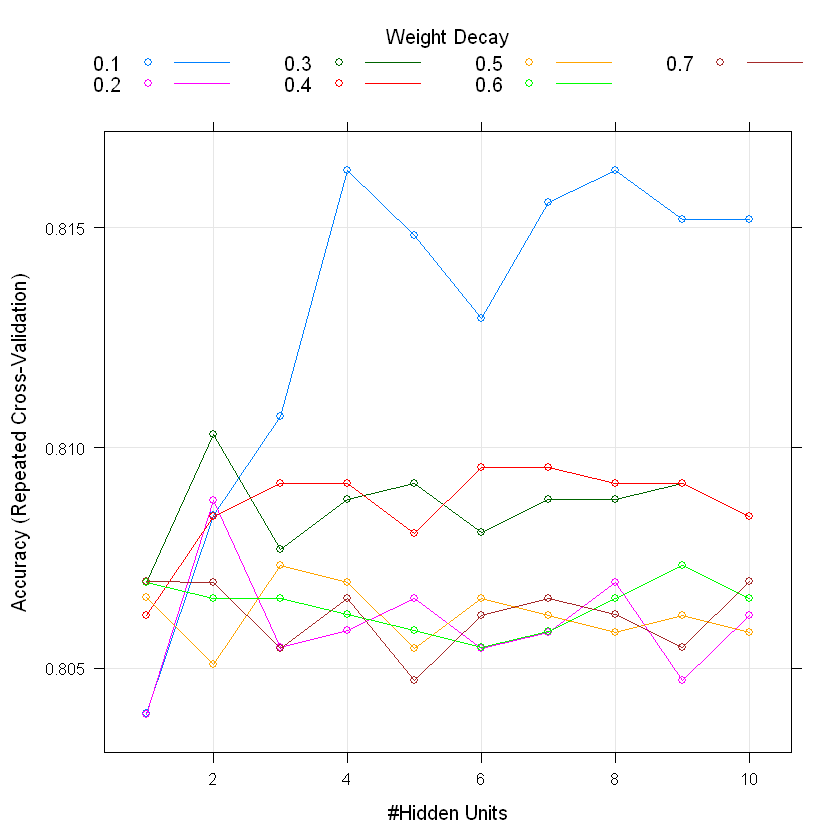

In [31]:
plot(fit_nnet)

In [65]:
y_hat_nnet <- predict(fit_nnet, titanic_test_factorized)
pred_nnet <- tibble(PassengerId = titanic_test$PassengerId,
                    Survived = as.character(y_hat_nnet))
write_csv(pred_nnet, "./csv_files/pred_nnet.csv")

nnet scored 0.76076

### knn

In [33]:
fit_knn <- train(Survived ~ ., method = "knn", data = titanic_train_factorized,
                tuneGrid = data.frame(k = seq(3, 33, 2)),
                trControl = trainControl(method="repeatedcv", number=10, repeats = 5))

In [34]:
fit_knn

k-Nearest Neighbors 

891 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 802, 802, 801, 802, 803, 802, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   3  0.8013192  0.5743939
   5  0.8029023  0.5761608
   7  0.8022157  0.5703644
   9  0.7990870  0.5598311
  11  0.8004556  0.5621124
  13  0.7970719  0.5509426
  15  0.8009024  0.5578584
  17  0.8020185  0.5597793
  19  0.8058162  0.5662732
  21  0.8064880  0.5663234
  23  0.8085053  0.5704448
  25  0.8102880  0.5736105
  27  0.8098488  0.5715292
  29  0.8075965  0.5656689
  31  0.8037886  0.5553550
  33  0.8024527  0.5520559

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 25.

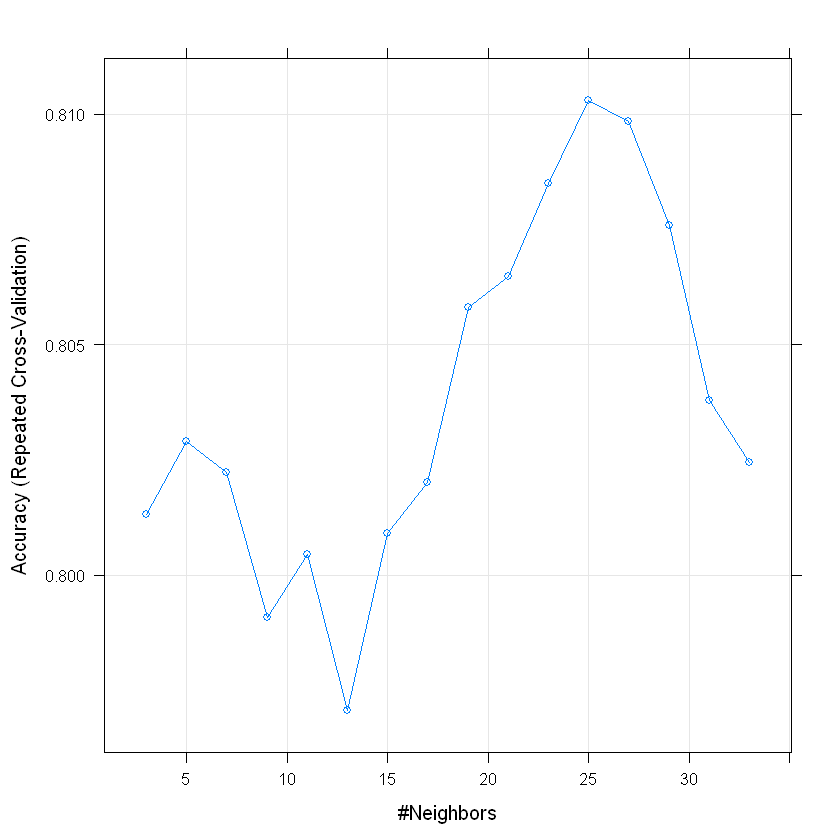

In [35]:
plot(fit_knn)

In [66]:
y_hat_knn <- predict(fit_knn, titanic_test_factorized)
pred_knn <- tibble(PassengerId = titanic_test$PassengerId,
                    Survived = as.character(y_hat_knn))
write_csv(pred_knn, "./csv_files/pred_knn.csv")

### Logistic regression with glm

In [37]:
fit_logit <- train(Survived ~ Sex + Fare + Pclass + FamilySize + Age, method = "glm", 
                data = titanic_train_factorized, family = "binomial")
                #trControl = trainControl(method="repeatedcv", number=8, repeats = 5))

In [38]:
fit_logit

Generalized Linear Model 

891 samples
  5 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 891, 891, 891, 891, 891, 891, ... 
Resampling results:

  Accuracy   Kappa    
  0.7989578  0.5703138


In [68]:
y_hat_logit <- predict(fit_logit, titanic_test_factorized)
pred_logit <- tibble(PassengerId = titanic_test$PassengerId,
                    Survived = as.character(y_hat_logit))
write_csv(pred_logit, "./csv_files/pred_logit.csv")

logit submission scored 0.75598

### Decision Tree with rpart

In [40]:
fit_rpart <- train(Survived ~ ., method = "rpart", tuneGrid = data.frame(cp = seq(0, 0.02, 0.001)),
                data = titanic_train_factorized,
                trControl = trainControl(method="repeatedcv", number=8, repeats = 5))

In [41]:
fit_rpart$bestTune

,cp
3,0.002


In [42]:
fit_rpart

CART 

891 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (8 fold, repeated 5 times) 
Summary of sample sizes: 780, 779, 779, 781, 779, 780, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa    
  0.000  0.8226986  0.6200541
  0.001  0.8238187  0.6222631
  0.002  0.8247056  0.6231187
  0.003  0.8231370  0.6189674
  0.004  0.8206696  0.6111819
  0.005  0.8168567  0.6016958
  0.006  0.8168648  0.6003781
  0.007  0.8125915  0.5904131
  0.008  0.8125915  0.5903251
  0.009  0.8139409  0.5932064
  0.010  0.8123561  0.5895487
  0.011  0.8107956  0.5863883
  0.012  0.8103452  0.5861470
  0.013  0.8103452  0.5861470
  0.014  0.8096776  0.5853399
  0.015  0.8096776  0.5853399
  0.016  0.8081050  0.5815055
  0.017  0.8065224  0.5777747
  0.018  0.8065224  0.5777747
  0.019  0.8069769  0.5788455
  0.020  0.8076526  0.5811750

Accuracy was used to select the optimal model using the largest value.
The final value used for the mo

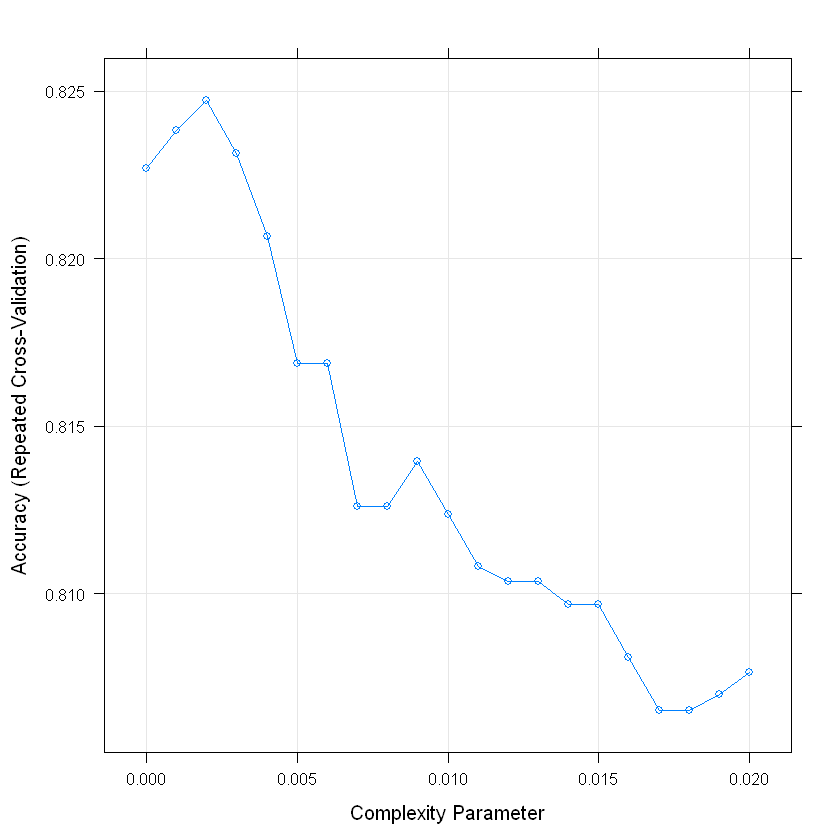

In [43]:
plot(fit_rpart)

In [67]:
y_hat_rpart <- predict(fit_rpart, titanic_test_factorized)
pred_rpart <- tibble(PassengerId = titanic_test$PassengerId,
                    Survived = as.character(y_hat_rpart))
write_csv(pred_rpart, "./csv_files/pred_rpart.csv")

In [45]:
varImp(fit_rpart)

rpart variable importance

           Overall
Sexmale    100.000
Fare        88.741
Pclass3     73.369
FamilySize  50.458
Age         34.500
SibSp       22.385
Pclass2     10.027
EmbarkedS    7.571
Parch        5.154
EmbarkedQ    0.000

In [46]:
nrow(pred_rpart)

[1] 418

rpart submission scored 0.77511

### Random Forest

In [76]:
fit_rf <- train(Survived ~ Sex + Pclass + Age + Fare + FamilySize, method = "rf", data = titanic_train_factorized,
               ntree = 1000, tuneGrid = data.frame(mtry = seq(2, 5, 1)),
               trControl = trainControl(method="repeatedcv", number=8, repeats = 5))
fit_rf$bestTune

,mtry
2,3


In [77]:
fit_rf

Random Forest 

891 samples
  5 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (8 fold, repeated 5 times) 
Summary of sample sizes: 779, 780, 780, 779, 780, 779, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.8282813  0.6249239
  3     0.8327597  0.6386596
  4     0.8262381  0.6273996
  5     0.8228739  0.6211299

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.

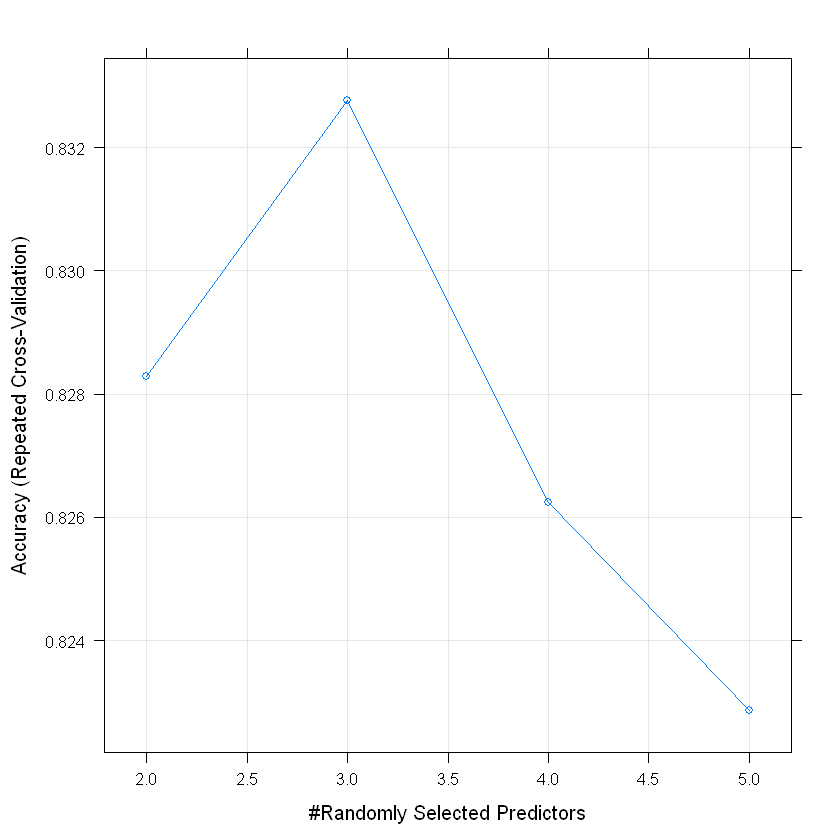

In [78]:
plot(fit_rf)

In [79]:
y_hat_rf <- predict(fit_rf, titanic_test_factorized)
pred_rf <- tibble(PassengerId = titanic_test$PassengerId,
                 Survived = as.character(y_hat_rf))
write_csv(pred_rf, "./csv_files/pred_rf.csv")

In [80]:
varImp(fit_rf)

rf variable importance

           Overall
Sexmale     100.00
Fare         75.68
Age          65.63
Pclass3      22.45
FamilySize   19.96
Pclass2       0.00

rf submission scored 0.78468

### SVM with linear kernel

In [52]:
fit_svm <- train(Survived ~ ., method = "svmLinear", data = titanic_train_factorized,
                 preProcess = c("center","scale"),
                 tuneGrid = expand.grid(C = seq(0.01, 2, length = 10)),
                 trControl = trainControl(method="repeatedcv", number=8, repeats = 5))

In [53]:
fit_svm

Support Vector Machines with Linear Kernel 

891 samples
  8 predictor
  2 classes: '0', '1' 

Pre-processing: centered (10), scaled (10) 
Resampling: Cross-Validated (8 fold, repeated 5 times) 
Summary of sample sizes: 780, 779, 780, 780, 779, 779, ... 
Resampling results across tuning parameters:

  C          Accuracy   Kappa    
  0.0100000  0.7867630  0.5419456
  0.2311111  0.7867610  0.5418379
  0.4522222  0.7865358  0.5414005
  0.6733333  0.7865358  0.5414005
  0.8944444  0.7865358  0.5414005
  1.1155556  0.7865358  0.5414005
  1.3366667  0.7863106  0.5409677
  1.5577778  0.7863106  0.5409677
  1.7788889  0.7863106  0.5409677
  2.0000000  0.7863106  0.5409677

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was C = 0.01.

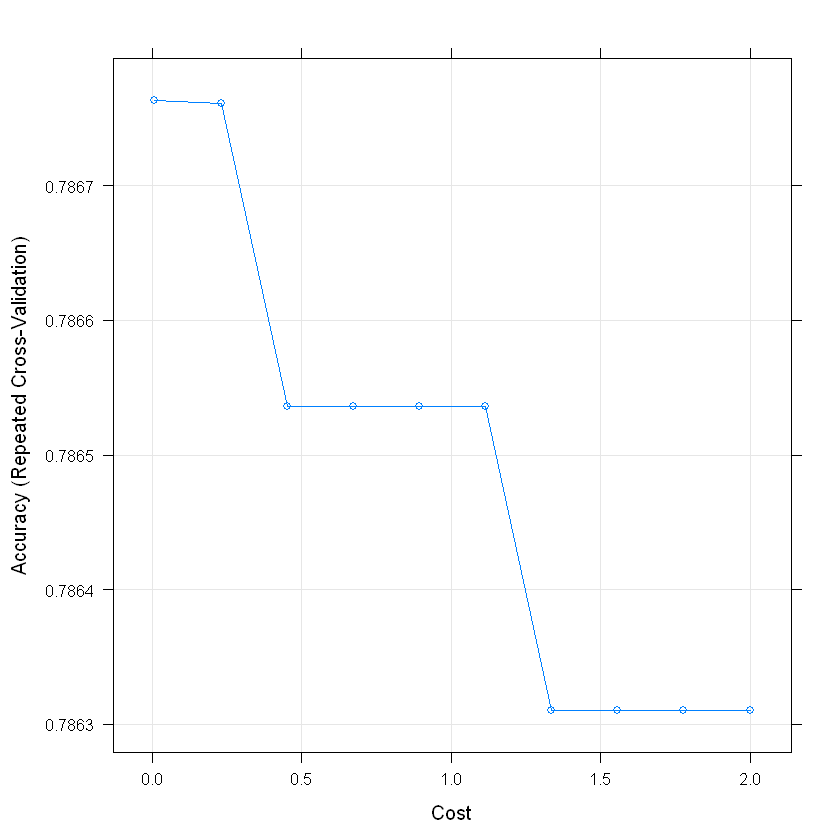

In [89]:
plot(fit_svm)

In [54]:
y_hat_svm <- predict(fit_svm, titanic_test_factorized)
pred_svm <- tibble(PassengerID = titanic_test$PassengerId,
                  Survived = as.character(y_hat_svm))
write_csv(pred_svm, "./csv_files/pred_svm.csv")

In [55]:
str(y_hat_svm)

 Factor w/ 2 levels "0","1": 1 2 1 1 2 1 2 1 2 1 ...


In [56]:
str(pred_svm$Survived)

 chr [1:418] "0" "1" "0" "0" "1" "0" "1" "0" "1" "0" "0" "0" "1" "0" "1" ...


SVM scored 0.76555



### Ensembles with select models

In [95]:
models <- c("pred_rf", "pred_nnet", "pred_rpart", "pred_knn", "pred_svm")
# excluding worst-performing logit model and gender model

In [82]:
length(pred_rf$Survived)

[1] 418

In [96]:
preds <- sapply(models, function(model){
    x = paste0(model, "$Survived")
    eval(parse(text = x))
})

In [97]:
dim(preds)

[1] 418   5

In [98]:
head(preds, 20)

pred_rf,pred_nnet,pred_rpart,pred_knn,pred_svm
0,0,0,0,0
0,0,0,0,1
0,0,0,0,0
0,0,0,0,0
1,0,1,0,1
0,0,0,0,0
0,1,1,1,1
0,0,0,0,0
1,1,1,1,1
0,0,0,0,0


In [99]:
votes <- rowMeans(preds == "1")
y_hat_ensembles <- ifelse(votes > 0.5, "1", "0")

In [100]:
str(y_hat_ensembles)

 chr [1:418] "0" "0" "0" "0" "1" "0" "1" "0" "1" "0" "0" "0" "1" "0" "1" ...


In [101]:
pred_ensembles <- tibble(PassengerID = titanic_test$PassengerId,
                  Survived = y_hat_ensembles)
write_csv(pred_ensembles, "./csv_files/pred_ensembles.csv")

ensembles scored 0.78947